# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

## Specifying filetype, and folder as before

In [32]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [46]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  approx_split  \
0                  21 187-9-203b-FIA.txt           0.0    103.808151   
1                   29 187-9-204-FIB.txt           0.0    103.544190   
2       30 187-9-204-FIC_CRR_DiadFit.txt           1.0    103.483699   
3                   31 187-9-204-FIE.txt           0.0    103.588183   
4                   32 187-9-204-FID.txt           0.0    103.505696   
5                   52 187-9-208-FIA.txt           0.0    103.401211   
6              59 187-9-210-MIA-rep2.txt           0.0    103.142749   
7  66 187-9-214-MIA-rep1_CRR_DiadFit.txt           1.0    103.049263   
8  68 187-9-214-MIA-rep3_CRR_DiadFit.txt           1.0    103.016268   

     Diad1_pos    Diad2_pos      HB1_pos      HB2_pos      C13_pos  \
0  1284.471898  1388.280049  1263.981928  1409.644390  1370.413191   
1  1284.994321  1388.538511          NaN  1410.073327          NaN   
2  1285.197791  1388.681490  1264.520848  1410.144816          NaN   
3  1284.950328  1388.538511          NaN  1410.183311          NaN   
4  1285.225287  1388.730983          NaN  1410.194309          NaN   
5  1285.582734  1388.983945          NaN  1410.282296          NaN   
6  1286.138152  1389.280901  1265.670178  1410.689236          NaN   
7  1286.479102  1389.528365  1266.011128  1410.766225          NaN   
8  1286.517596  1389.533864  1266.060621  1410.766225          NaN   

   Diad1_abs_prom  Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  \
0      630.645251     1285.896301  ...  748.856385   711.32762   1308.020251   
1      269.059475      533.436022  ...  701.375629         NaN    936.434475   
2      594.614990     1115.326383  ...  744.942796         NaN   1264.864990   
3      281.455868      564.593516  ...  698.788279         NaN    949.830868   
4      361.617047      675.456651  ...  710.560278         NaN   1028.742047   
5      333.622125      606.405242  ...  726.063548         NaN   1017.022119   
6      452.212113      709.986736  ...  772.570671         NaN   1161.587113   
7      337.028914      577.034725  ...  749.529129         NaN   1032.778914   
8      350.901064      578.732955  ...  761.525088         NaN   1057.026064   

   HB1_height  Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0  719.468811        677.375000        677.250000                2.544656   
1         NaN        667.375000        666.437500                     NaN   
2  706.447612        670.250000        669.375000                     NaN   
3         NaN        668.375000        667.375000                     NaN   
4         NaN        667.125000        666.437500                     NaN   
5         NaN        683.399994        683.200012                     NaN   
6  748.692094        709.375000        708.750000                     NaN   
7  726.028381        695.750000        693.375000                     NaN   
8  740.000456        706.125000        703.875000                     NaN   

   Diad2_HB2_Valley_prom  HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0               1.004246                  24.453548                  41.030939  
1               1.001876                        NaN                  26.241807  
2               1.000559                  21.954275                  45.392202  
3               0.999064                        NaN                  22.167970  
4               0.997007                        NaN                  29.893662  
5               0.992701                        NaN                  26.625003  
6               0.993655                  20.140197                  33.305309  
7               0.992422                  11.495856                  22.980479  
8               0.991135                  15.304339                  27.750717  

[9 rows x 40 columns]

### Now load one file from this group to tweak parameters for

In [34]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

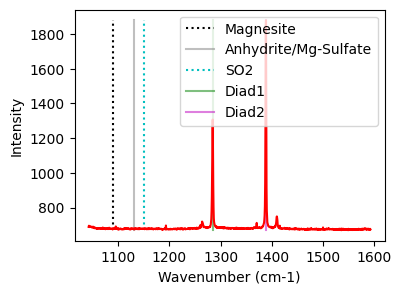

In [35]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [36]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [37]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=630.6452507735503, HB_prom=43.718810609270804, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1284.409455       1284.409505        0.004258       1732.589716   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma    HB1_Cent    HB1_Area  HB1_Sigma  \
0           1.018065                  0  1264.27751  212.902918   1.871689   

   Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  \
0             625.630396        2.990958        0.675538     2.03613   

         Diad1_refit  Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0  Flagged Warnings:      1.149281      1.175192                   0.303955   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.003255  PseudoVoigtModel

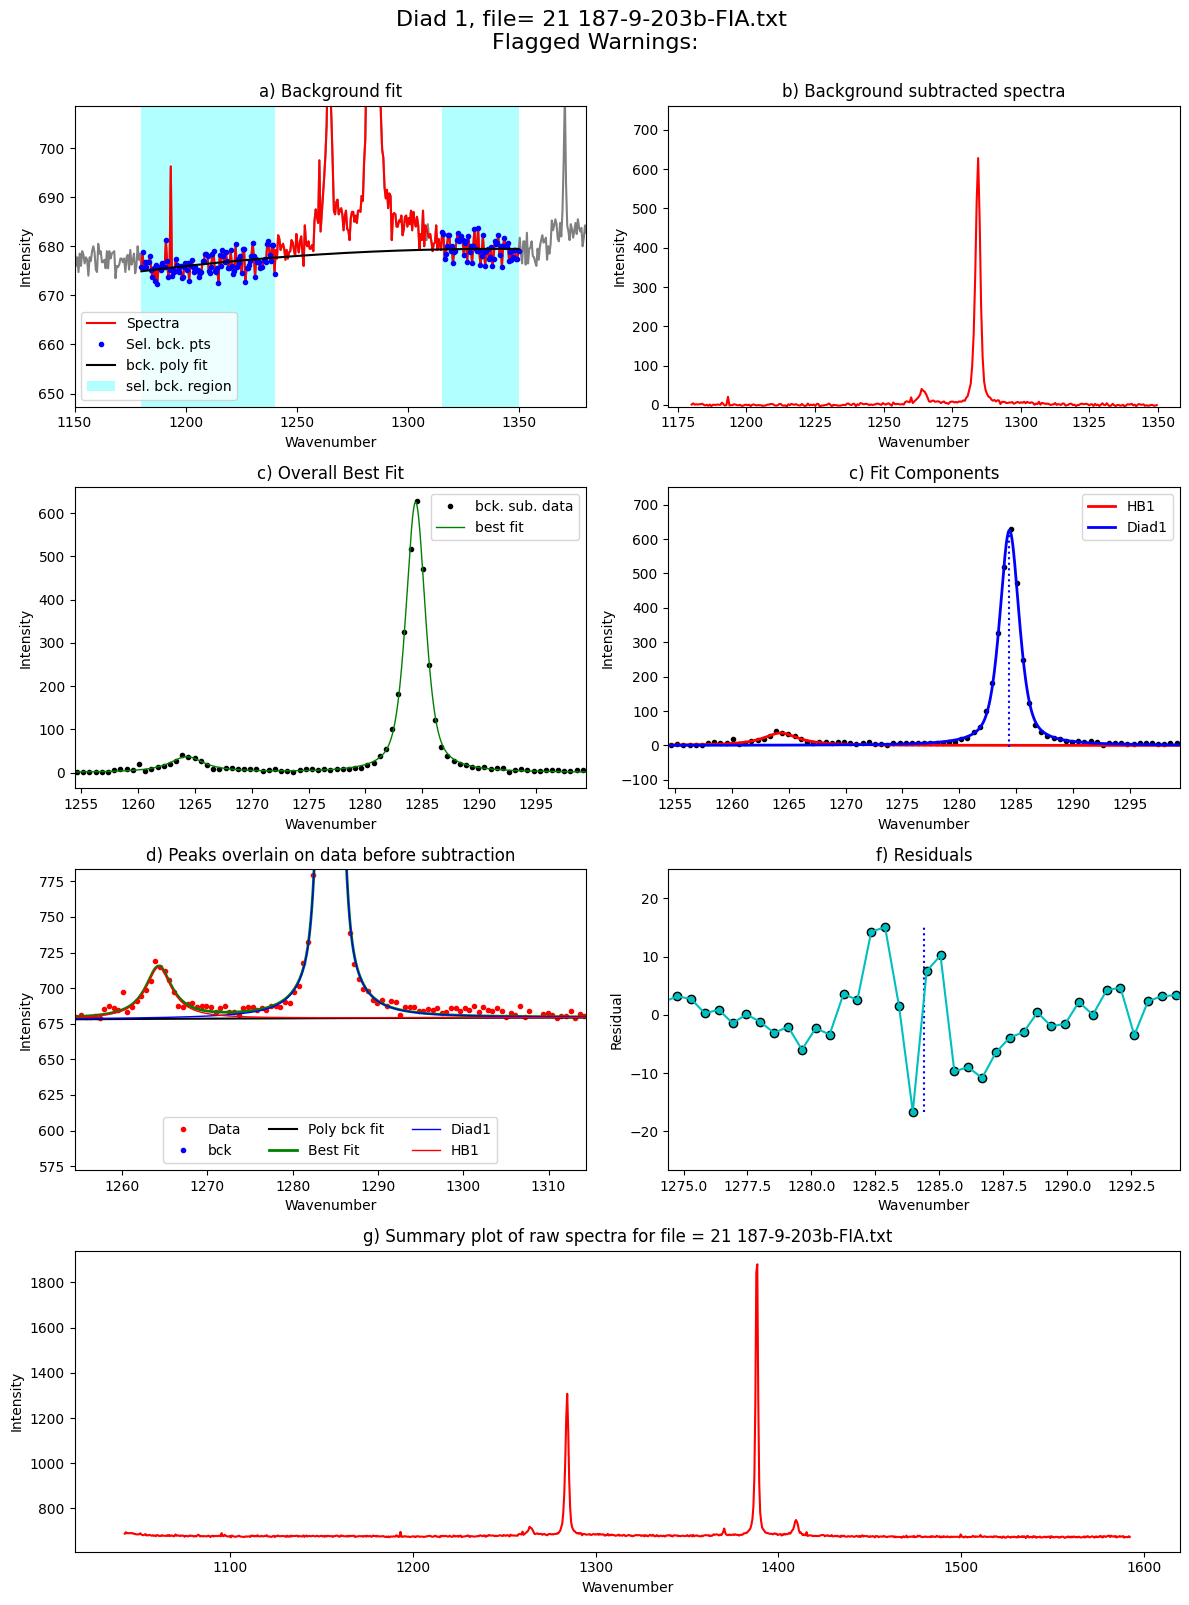

In [38]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [39]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [40]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=False, gauss_amp=146.71277022574372, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1285.8963006541867, HB_prom=73.35638511287186, C13_prom=28.82762020635346, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1388.258855       1388.258805        0.001632       2675.474347   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma    HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.736937                  0  1409.69349  306.570326   1.376768   

      C13_Cent  ...  Diad2_Combofit_Height  Diad2_Residual  Diad2_Prop_Lor  \
0  1370.288701  ...            1320.904669        2.604057          0.6999   

   Diad2_fwhm        Diad2_refit  Diad2_Asym50 Diad2_Asym70  \
0    1.473875  Flagged Warnings:      1.050459     1.067993   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0                    0.07437              0.001116  PseudoVoigtModel  

[1 rows x 22 columns]

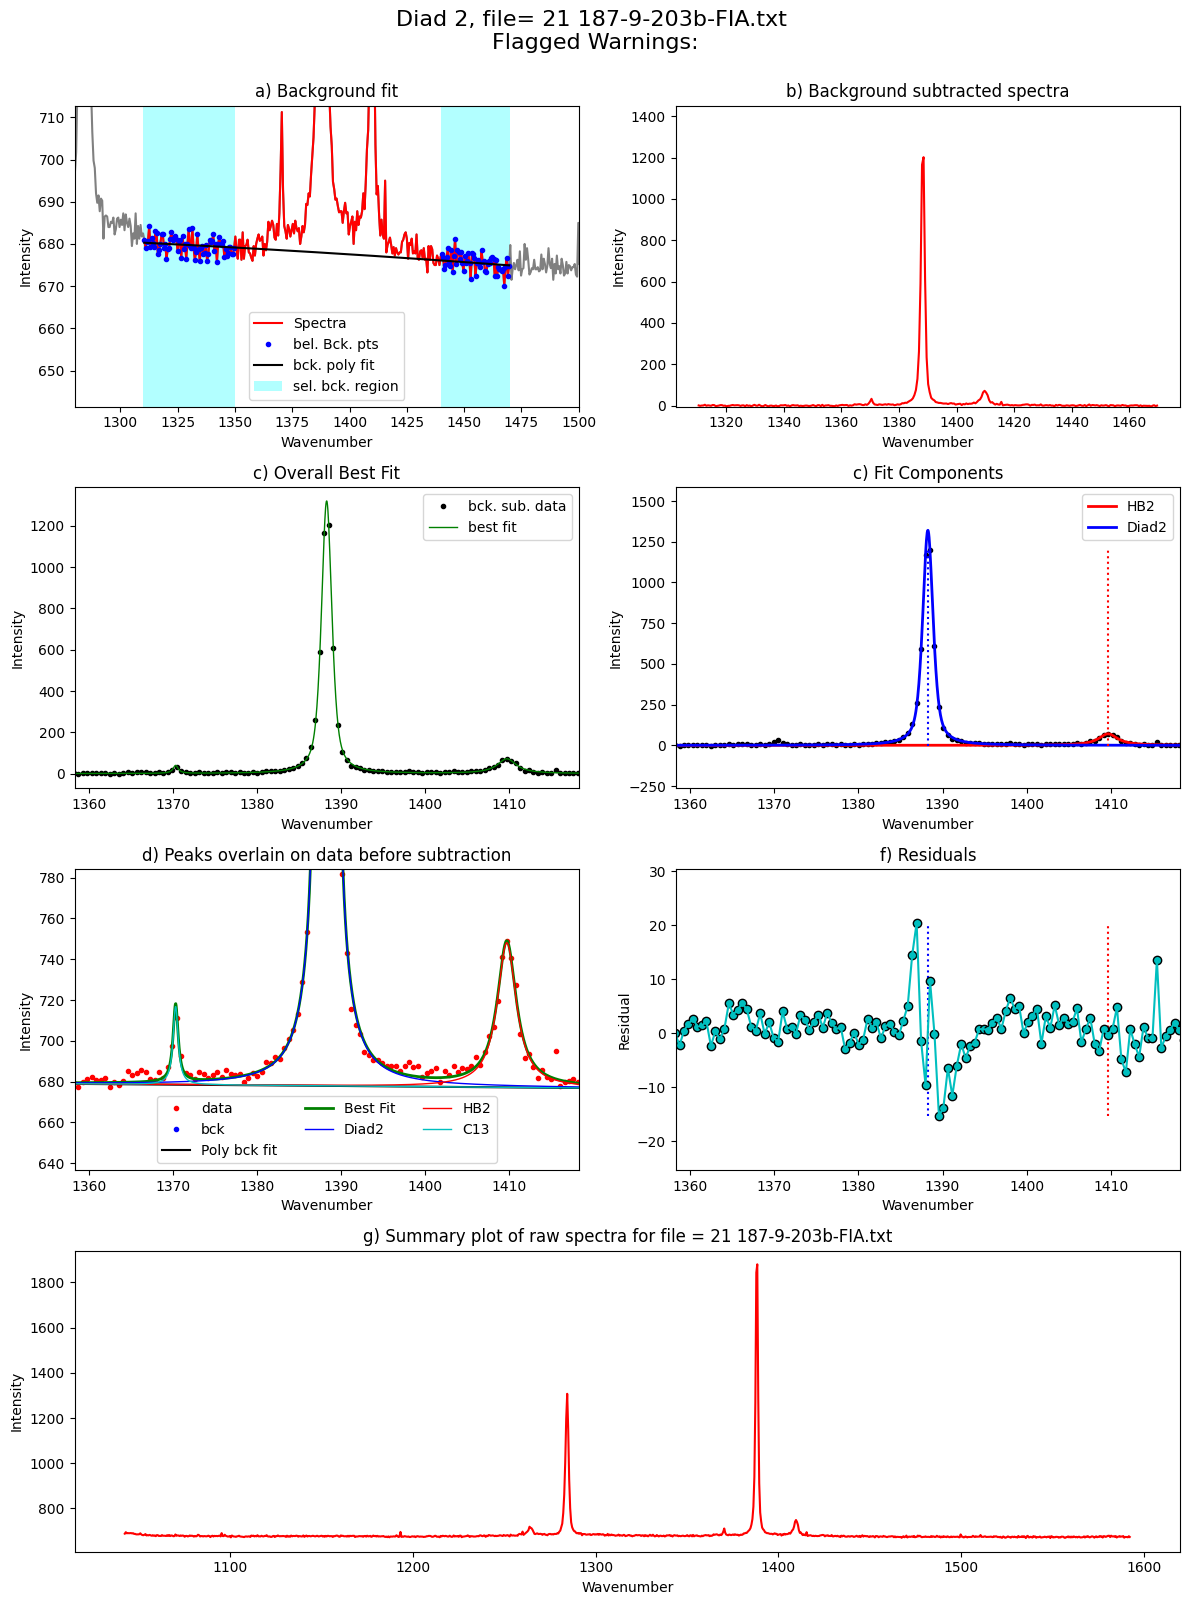

In [41]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/9 [00:00<?, ?it/s]

Processing file: 21 187-9-203b-FIA.txt


 11%|█         | 1/9 [00:05<00:42,  5.37s/it]

Processing file: 29 187-9-204-FIB.txt


 22%|██▏       | 2/9 [00:10<00:36,  5.19s/it]

Processing file: 30 187-9-204-FIC_CRR_DiadFit.txt


 33%|███▎      | 3/9 [00:16<00:32,  5.38s/it]

Processing file: 31 187-9-204-FIE.txt


 44%|████▍     | 4/9 [00:21<00:26,  5.28s/it]

Processing file: 32 187-9-204-FID.txt


 56%|█████▌    | 5/9 [00:26<00:21,  5.28s/it]

Processing file: 52 187-9-208-FIA.txt


 67%|██████▋   | 6/9 [00:31<00:15,  5.30s/it]

Processing file: 59 187-9-210-MIA-rep2.txt


 78%|███████▊  | 7/9 [00:41<00:13,  6.60s/it]

Processing file: 66 187-9-214-MIA-rep1_CRR_DiadFit.txt


 89%|████████▉ | 8/9 [00:53<00:08,  8.53s/it]

Processing file: 68 187-9-214-MIA-rep3_CRR_DiadFit.txt


100%|██████████| 9/9 [01:01<00:00,  6.88s/it]


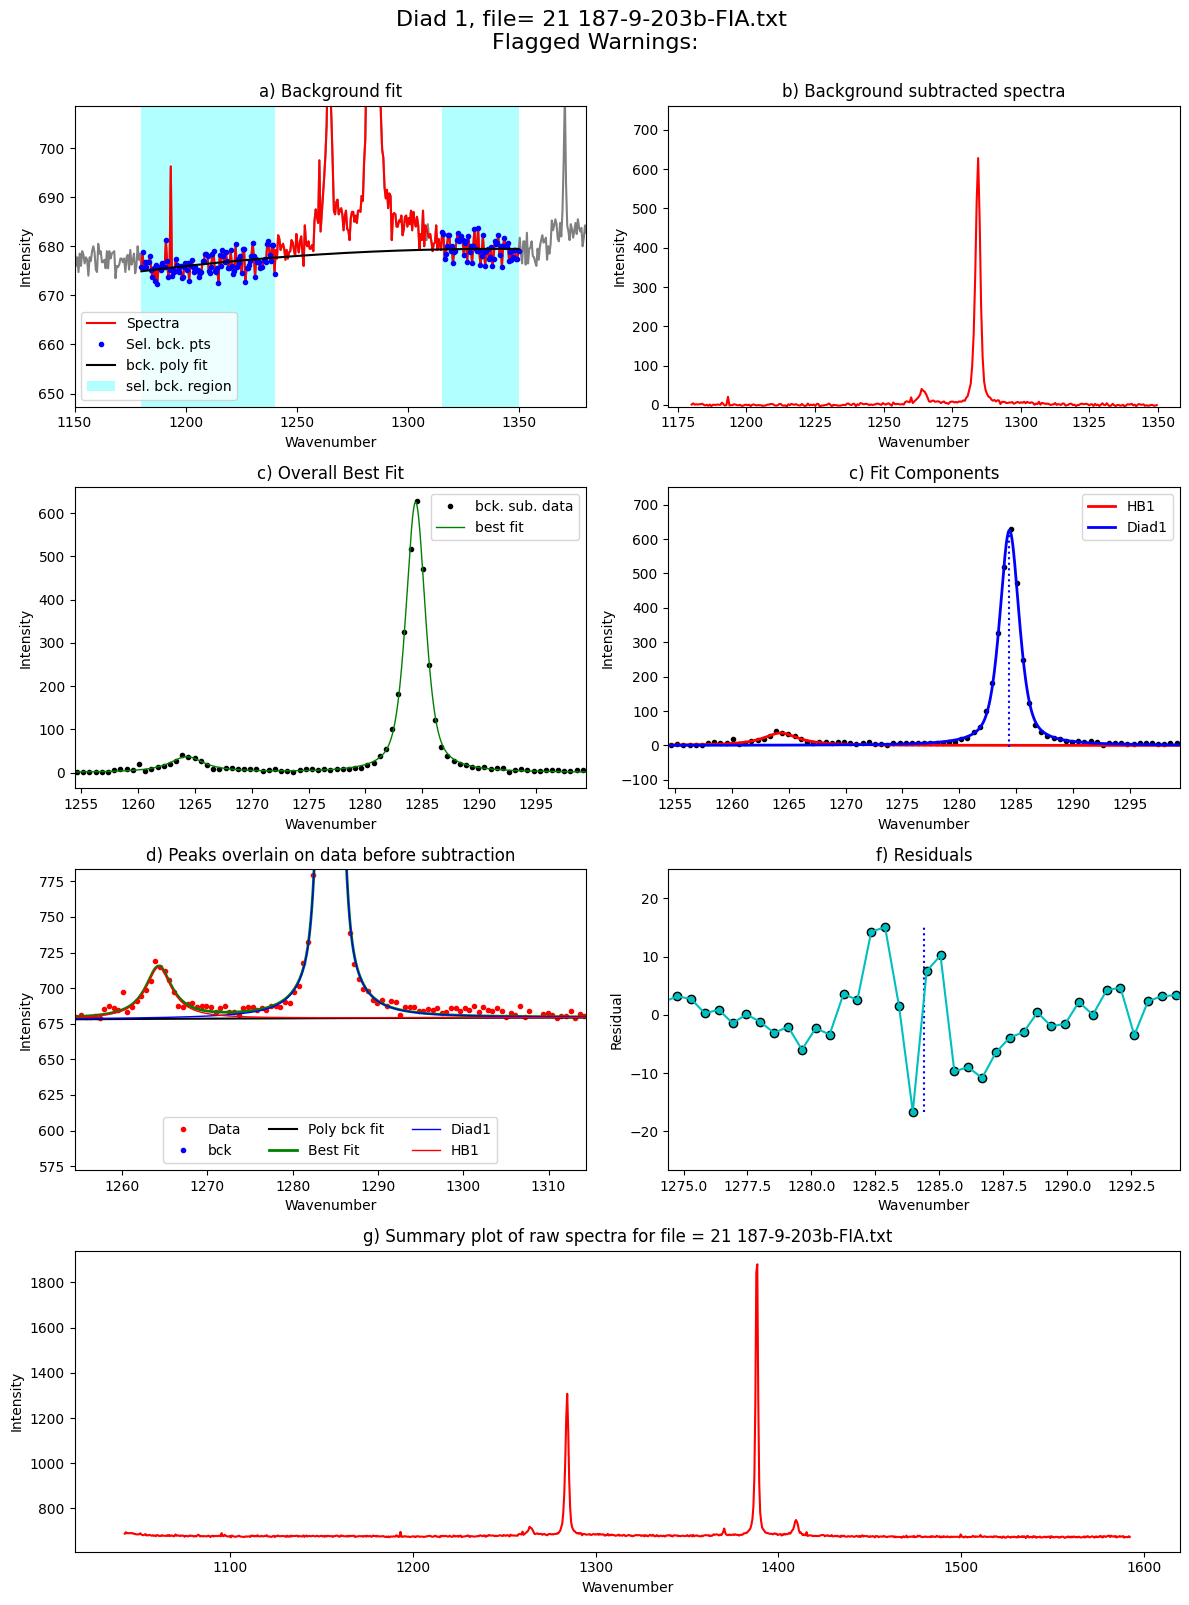

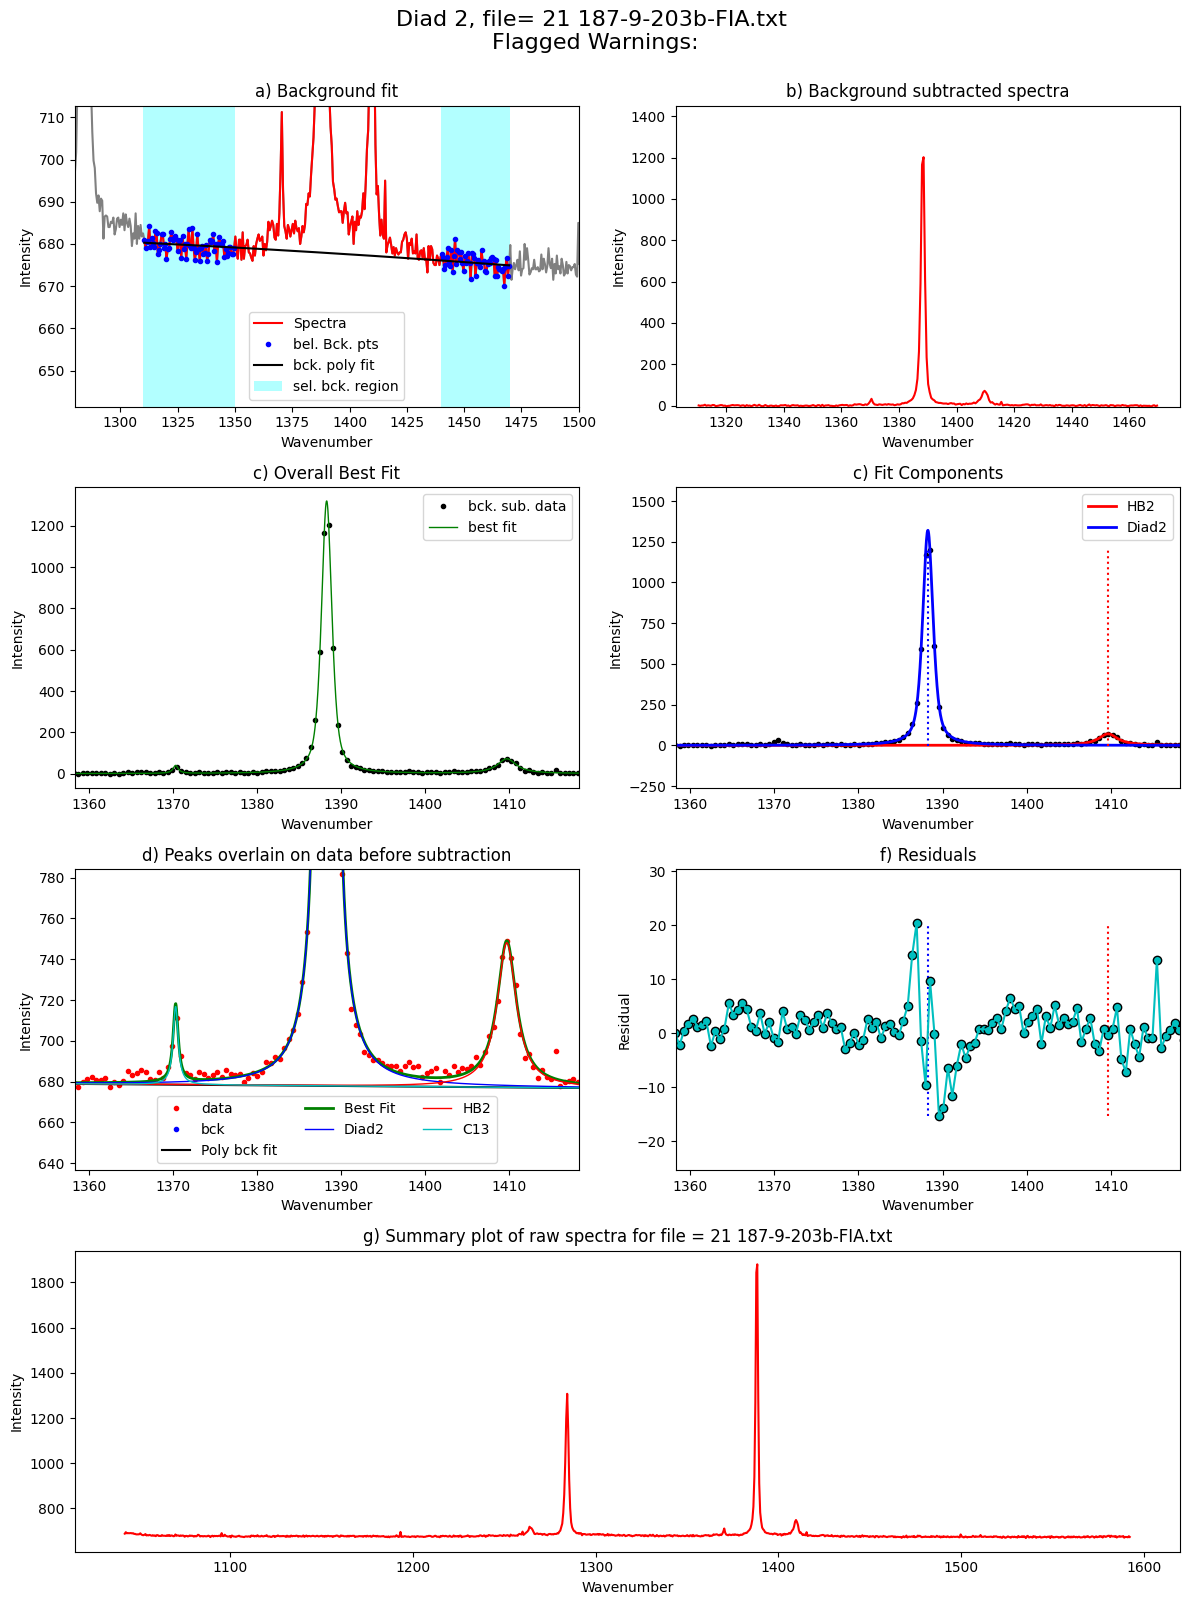

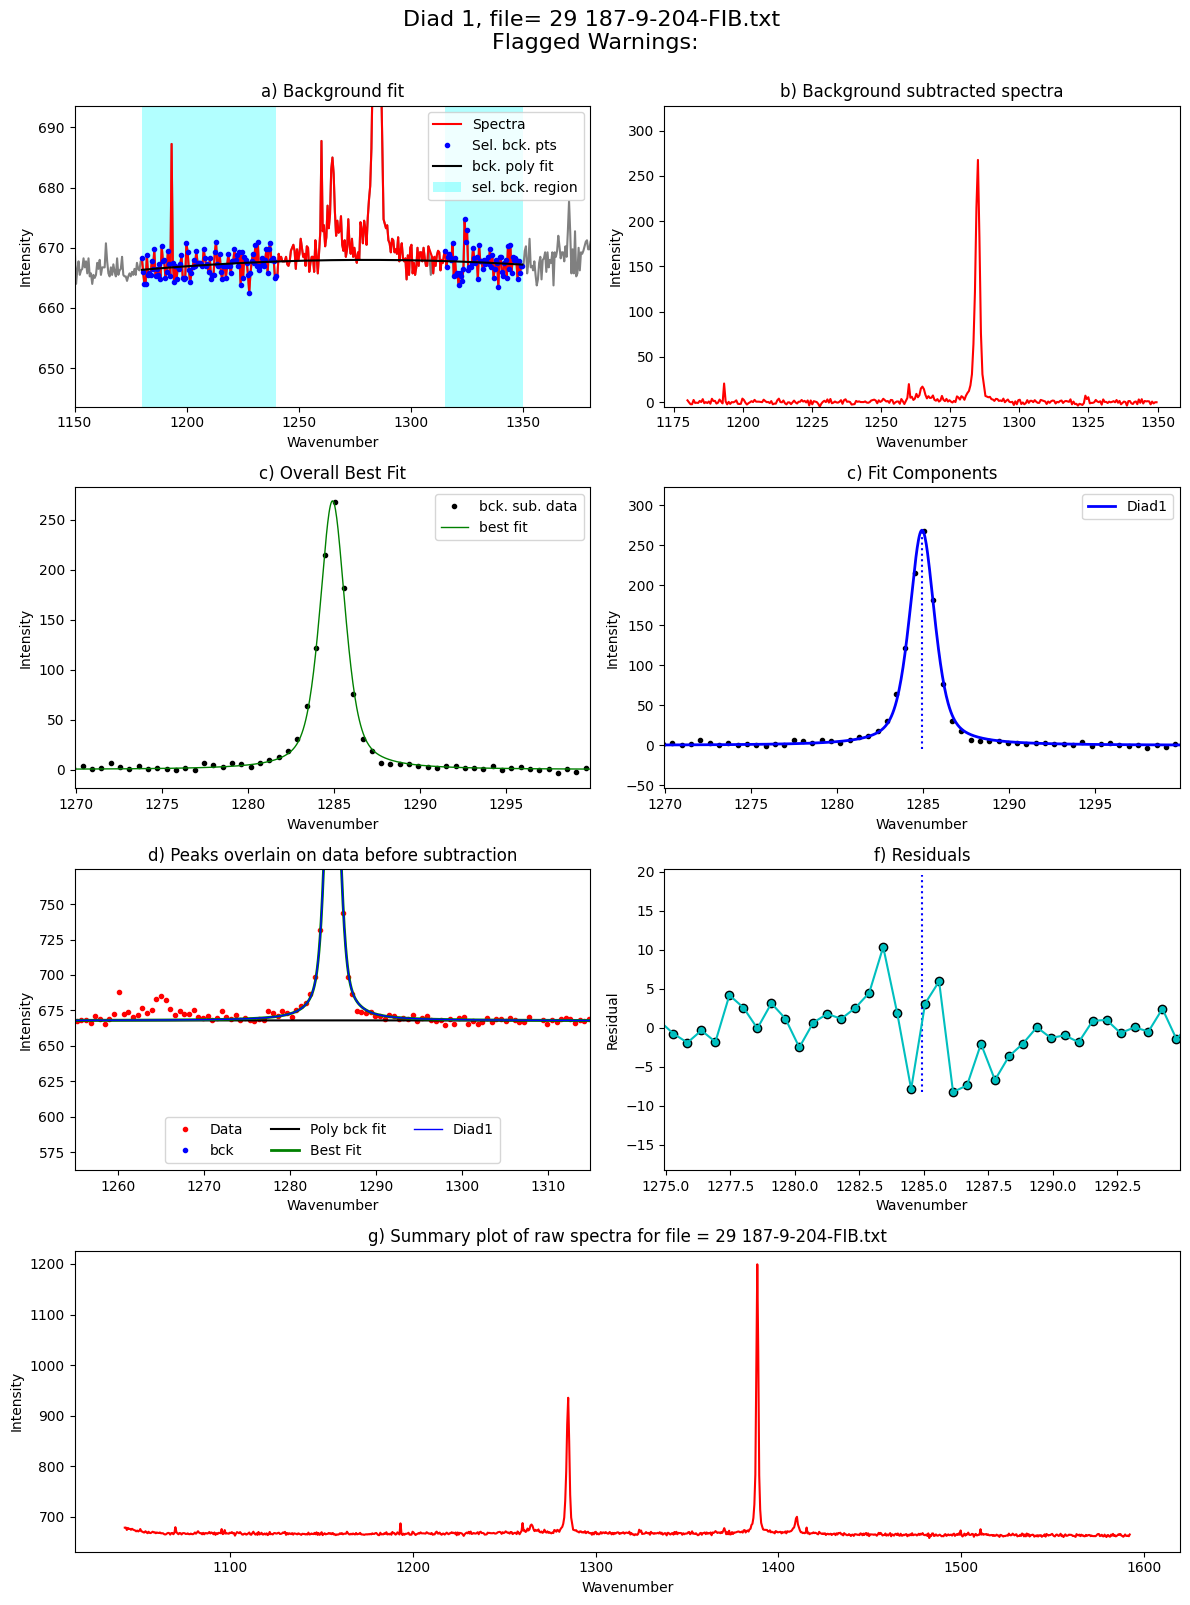

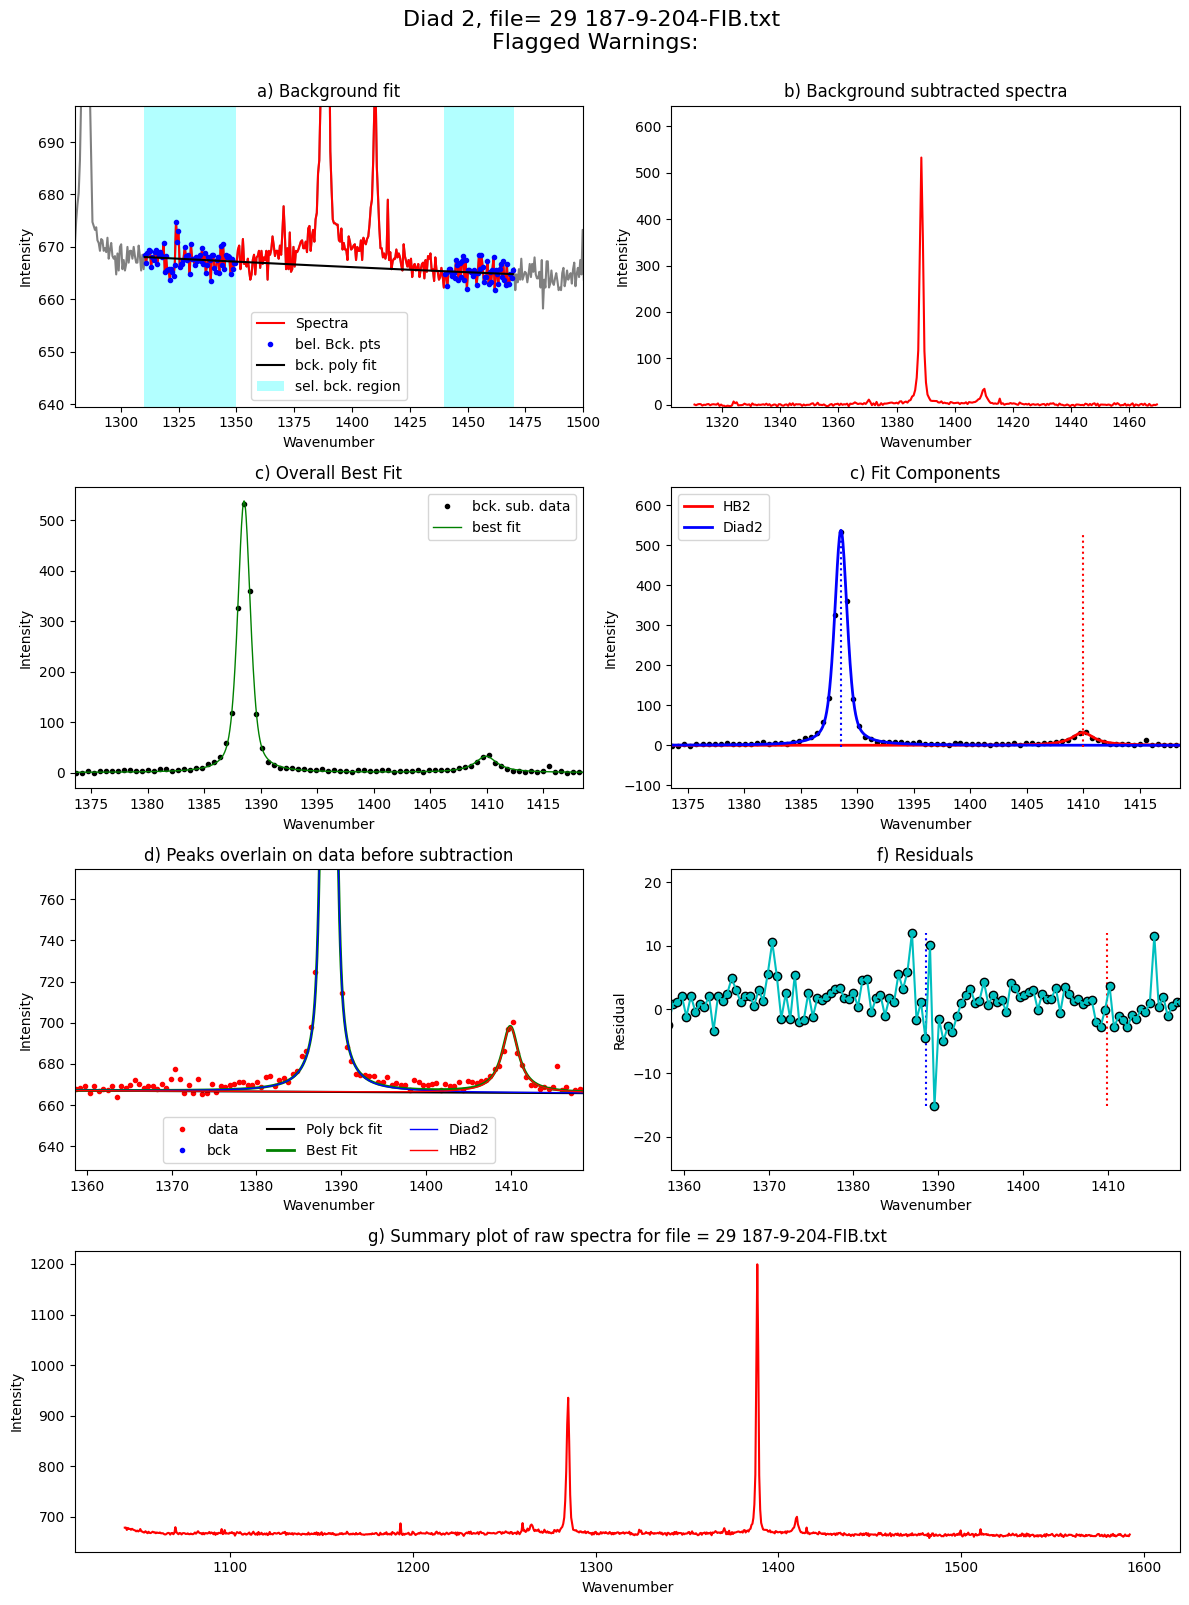

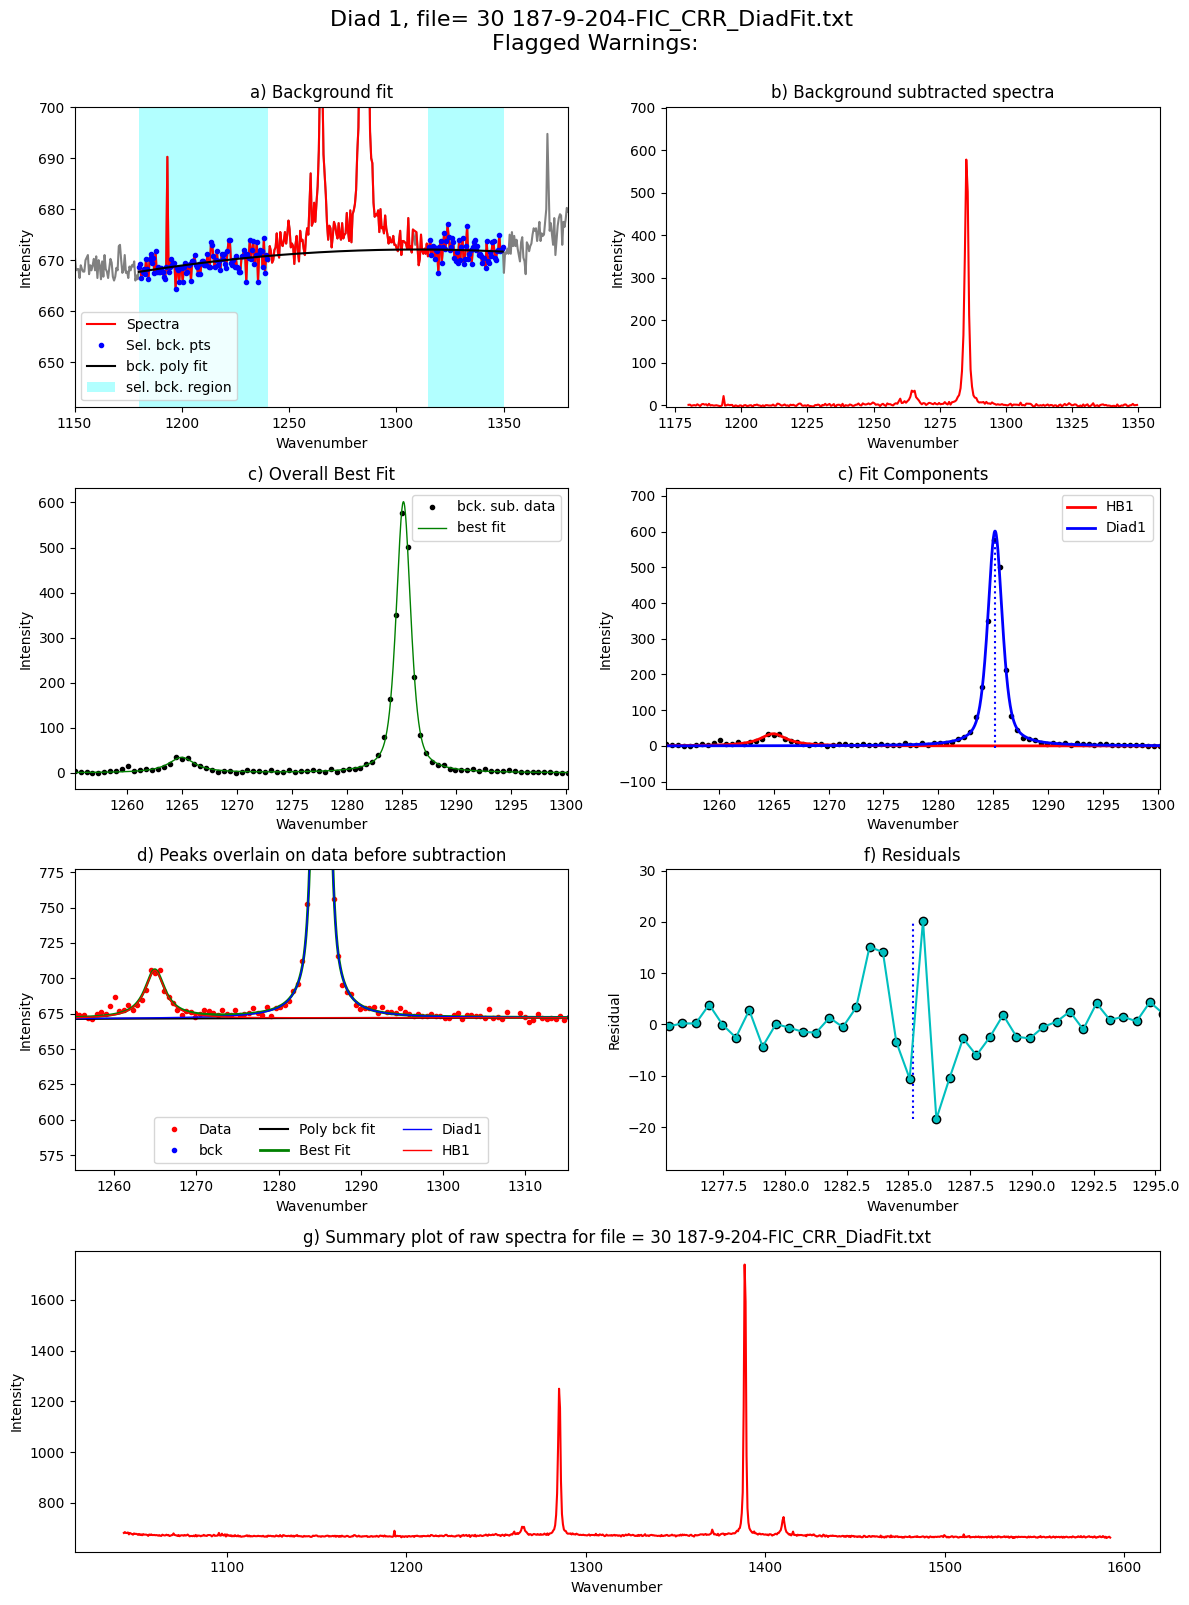

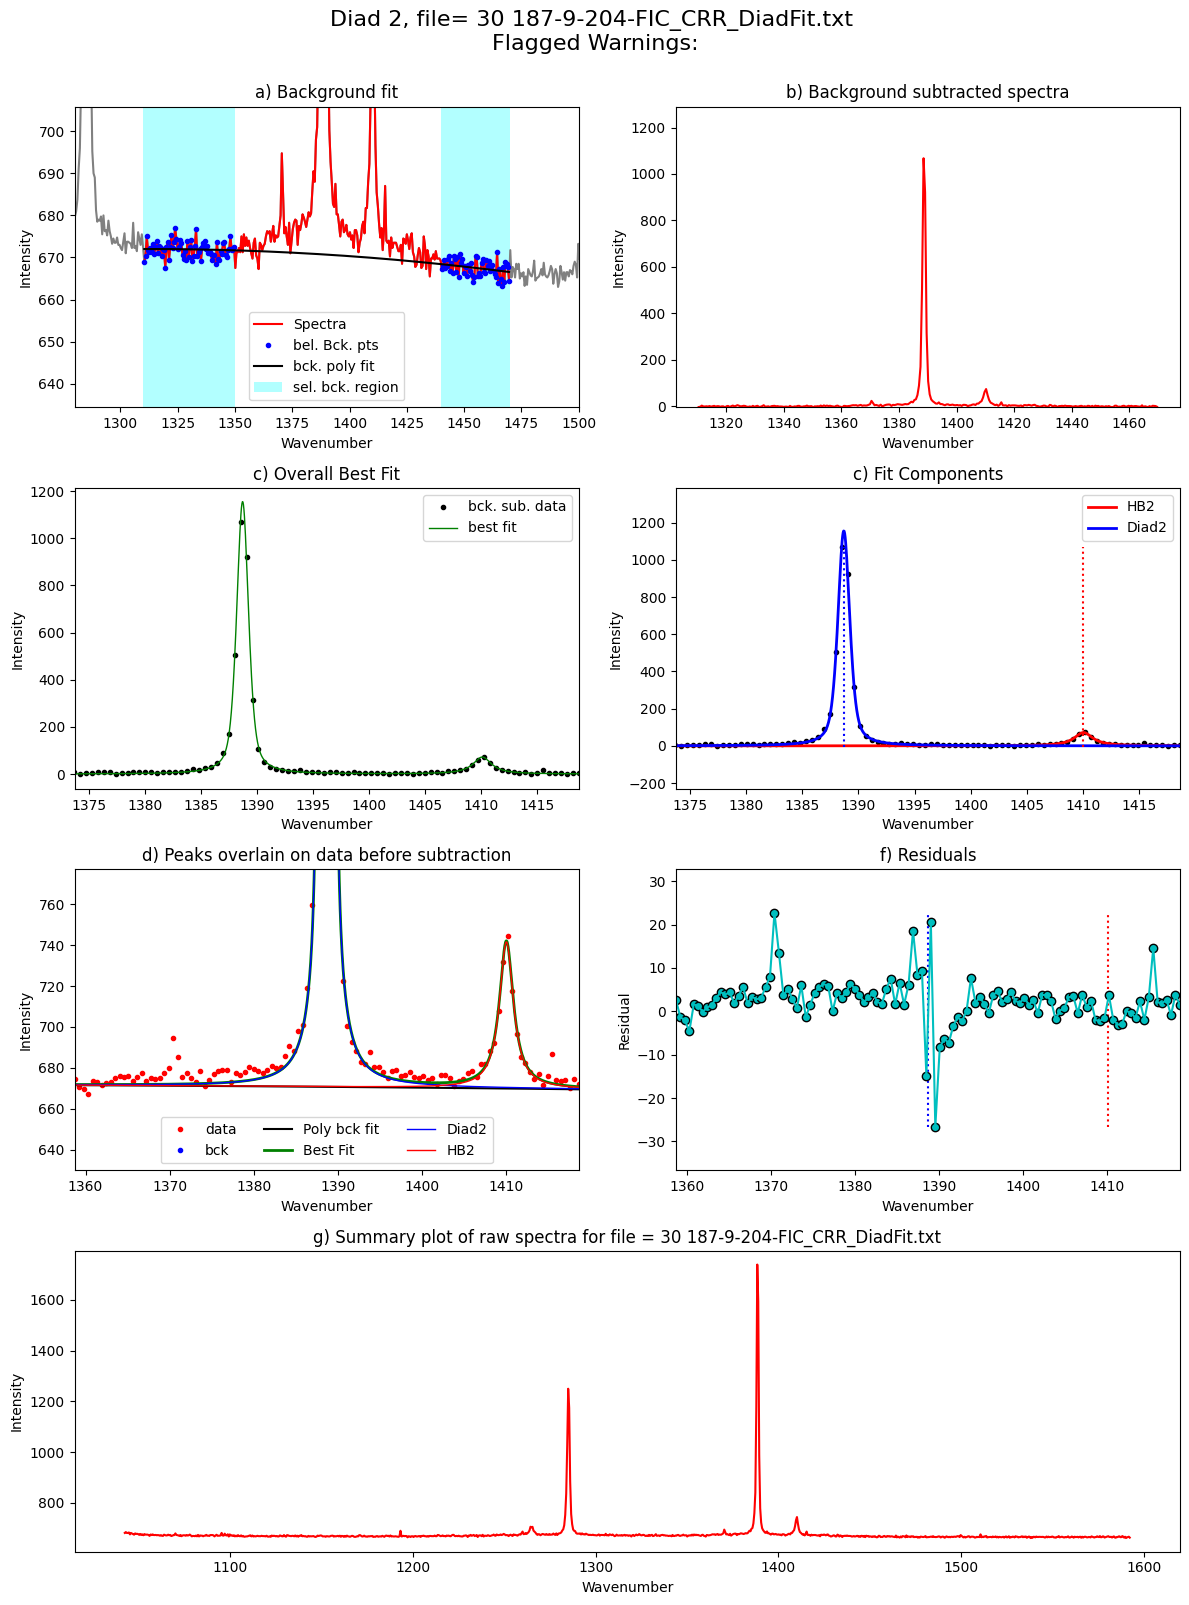

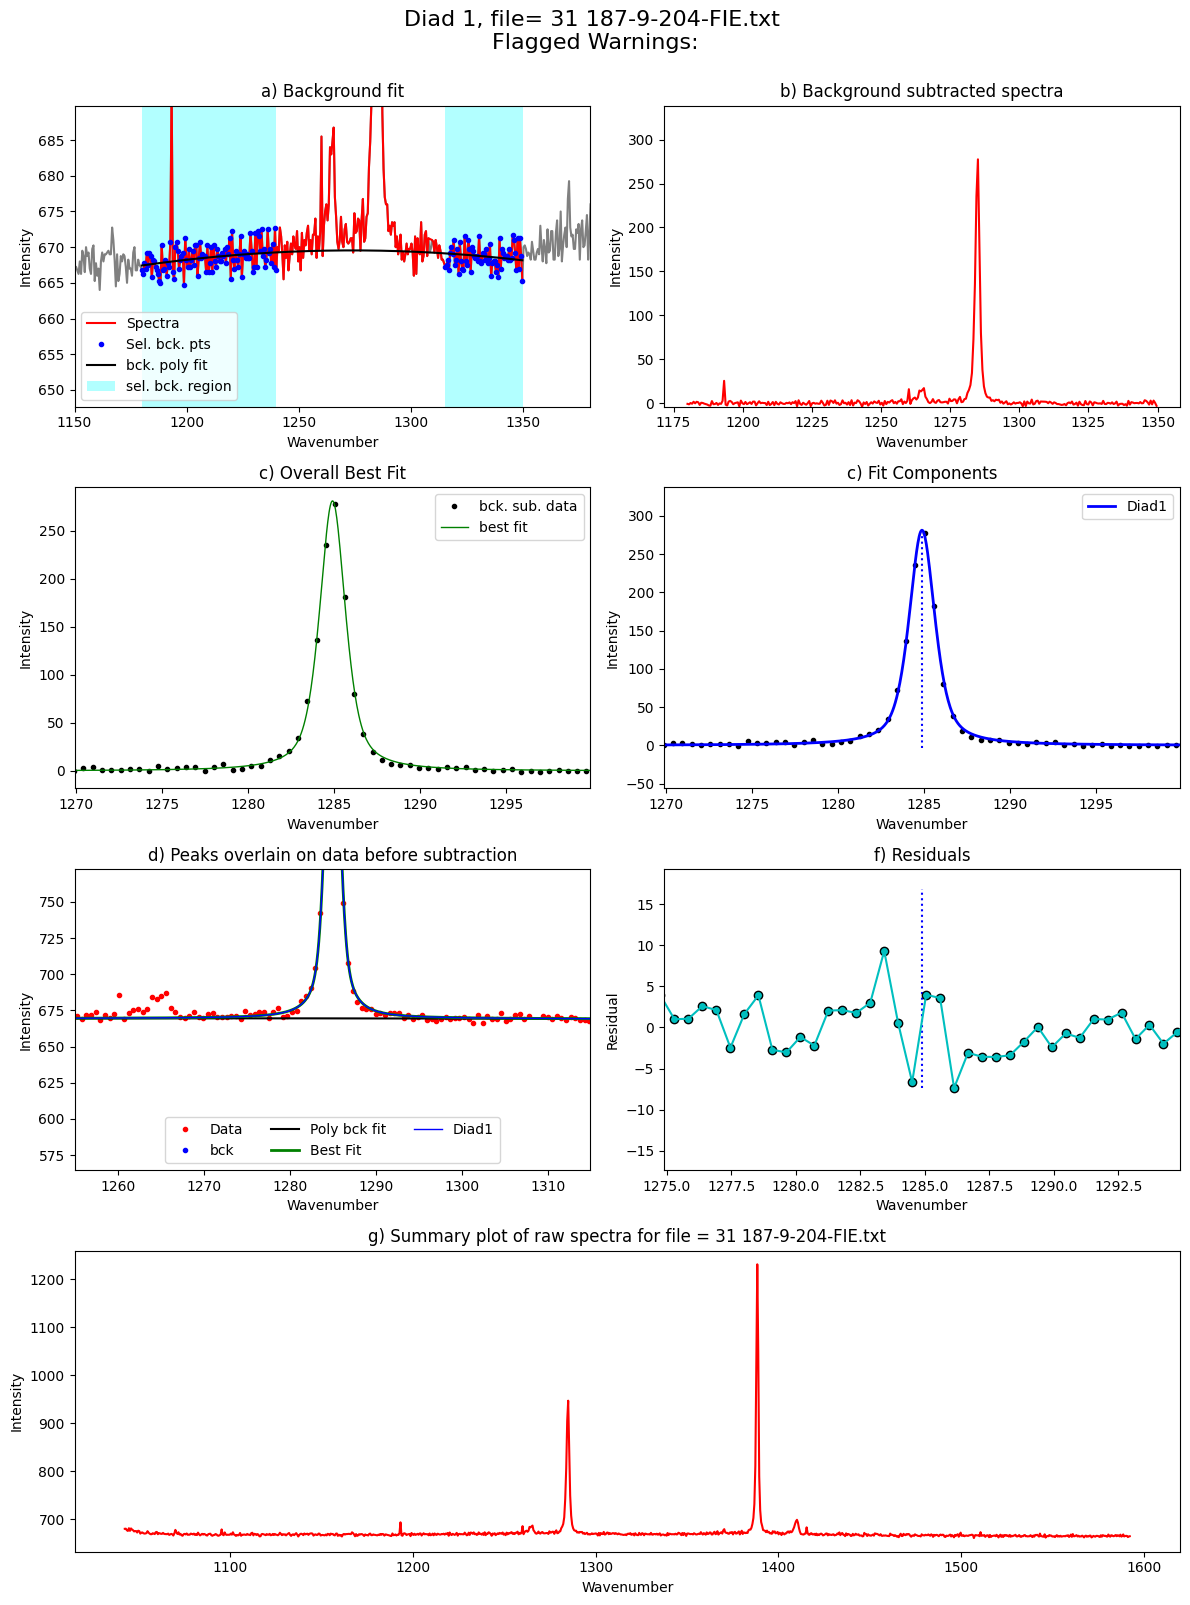

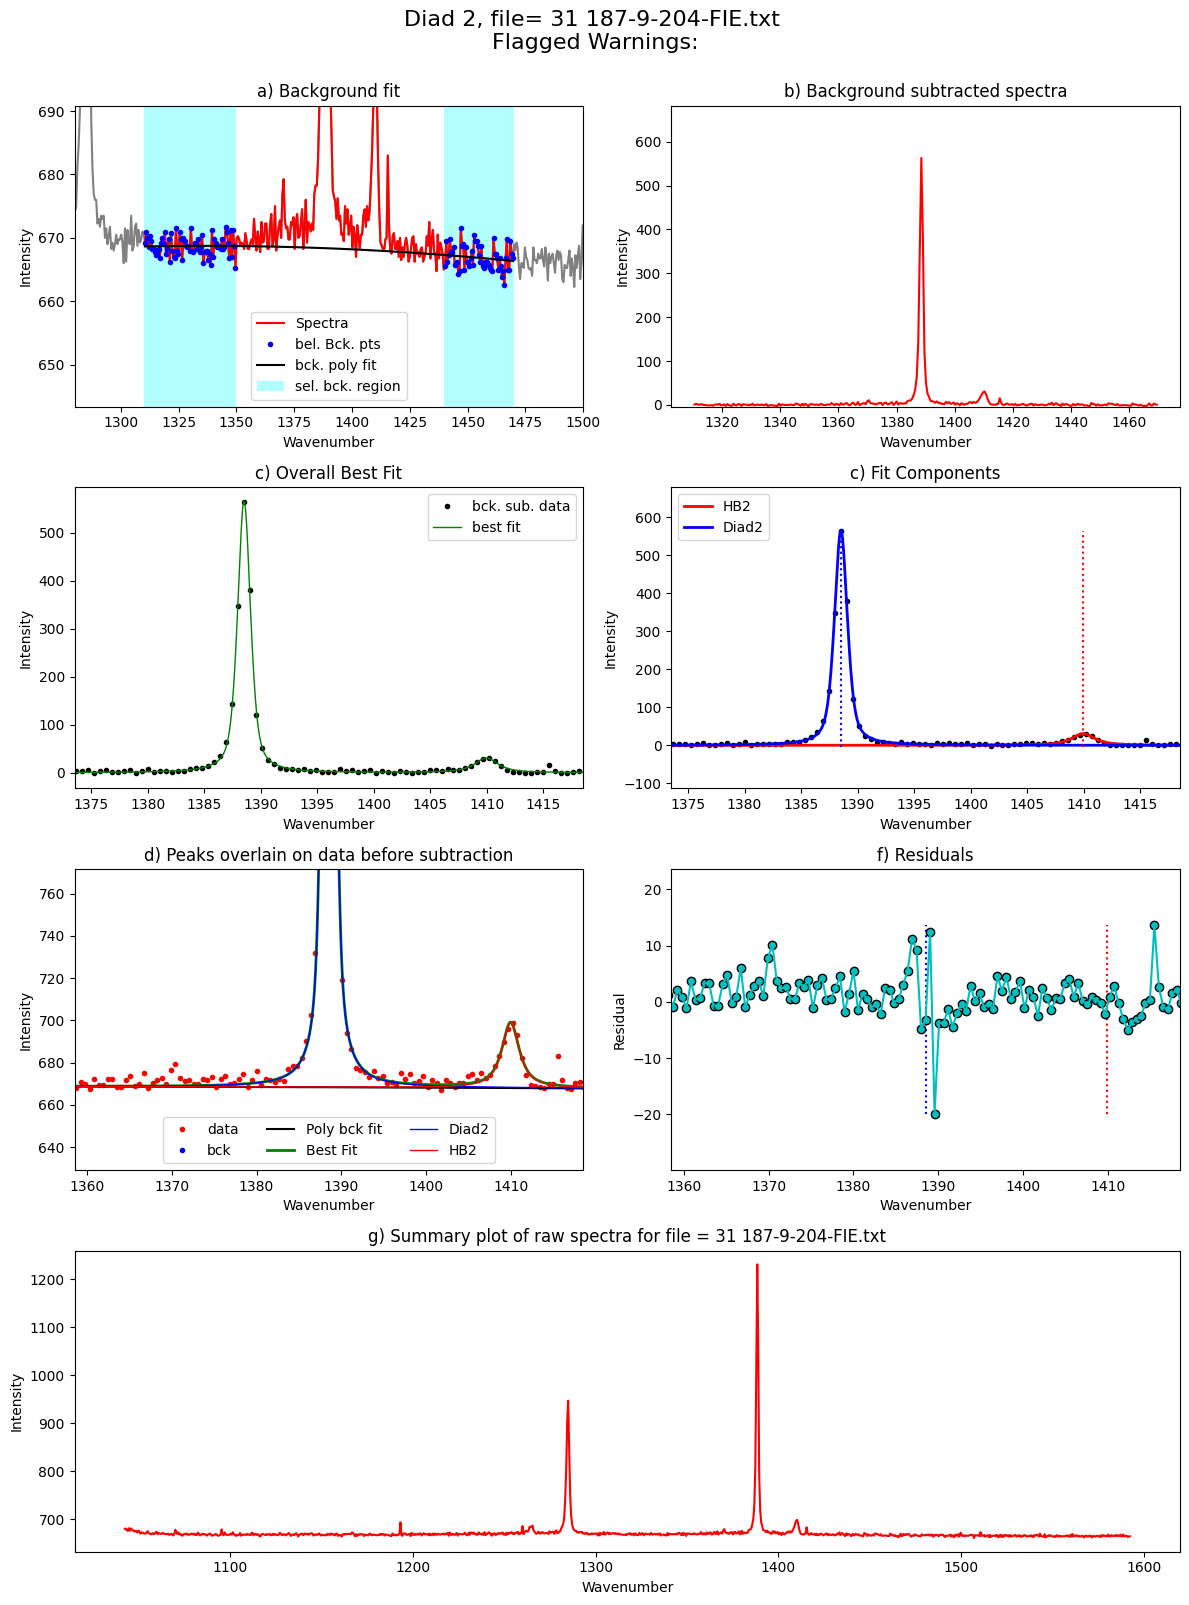

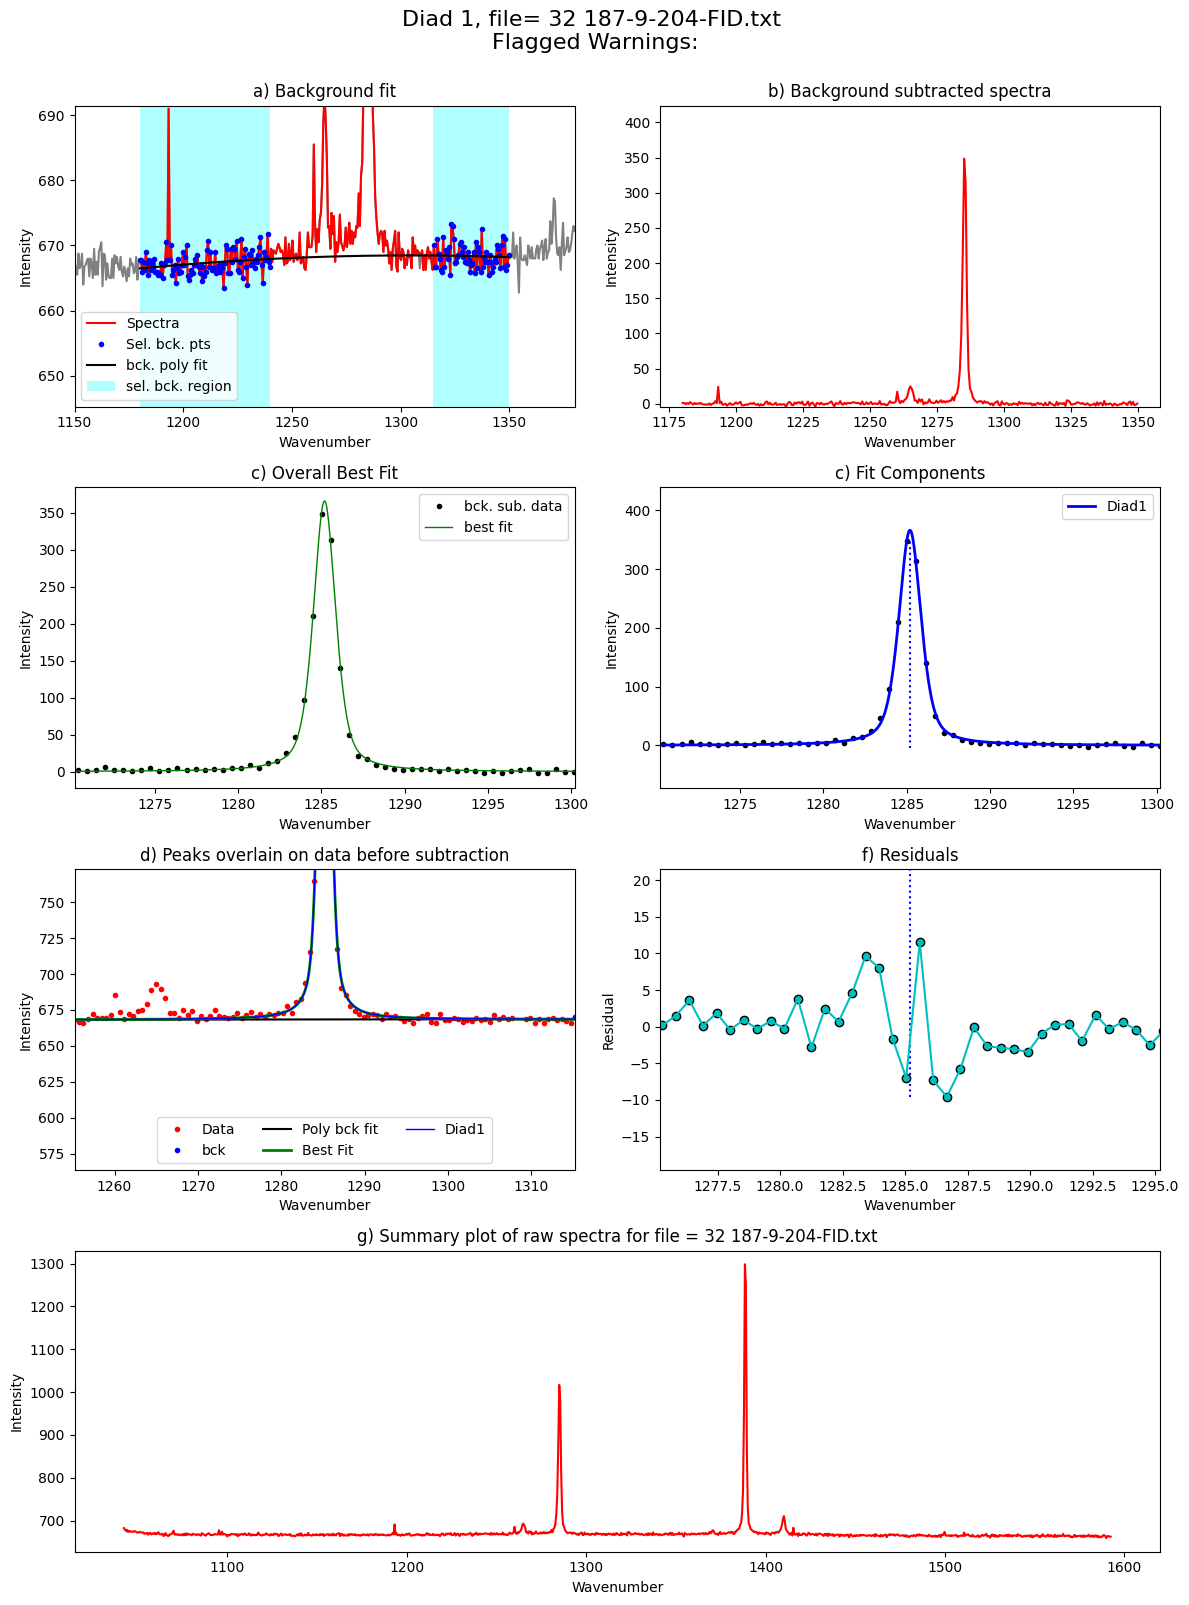

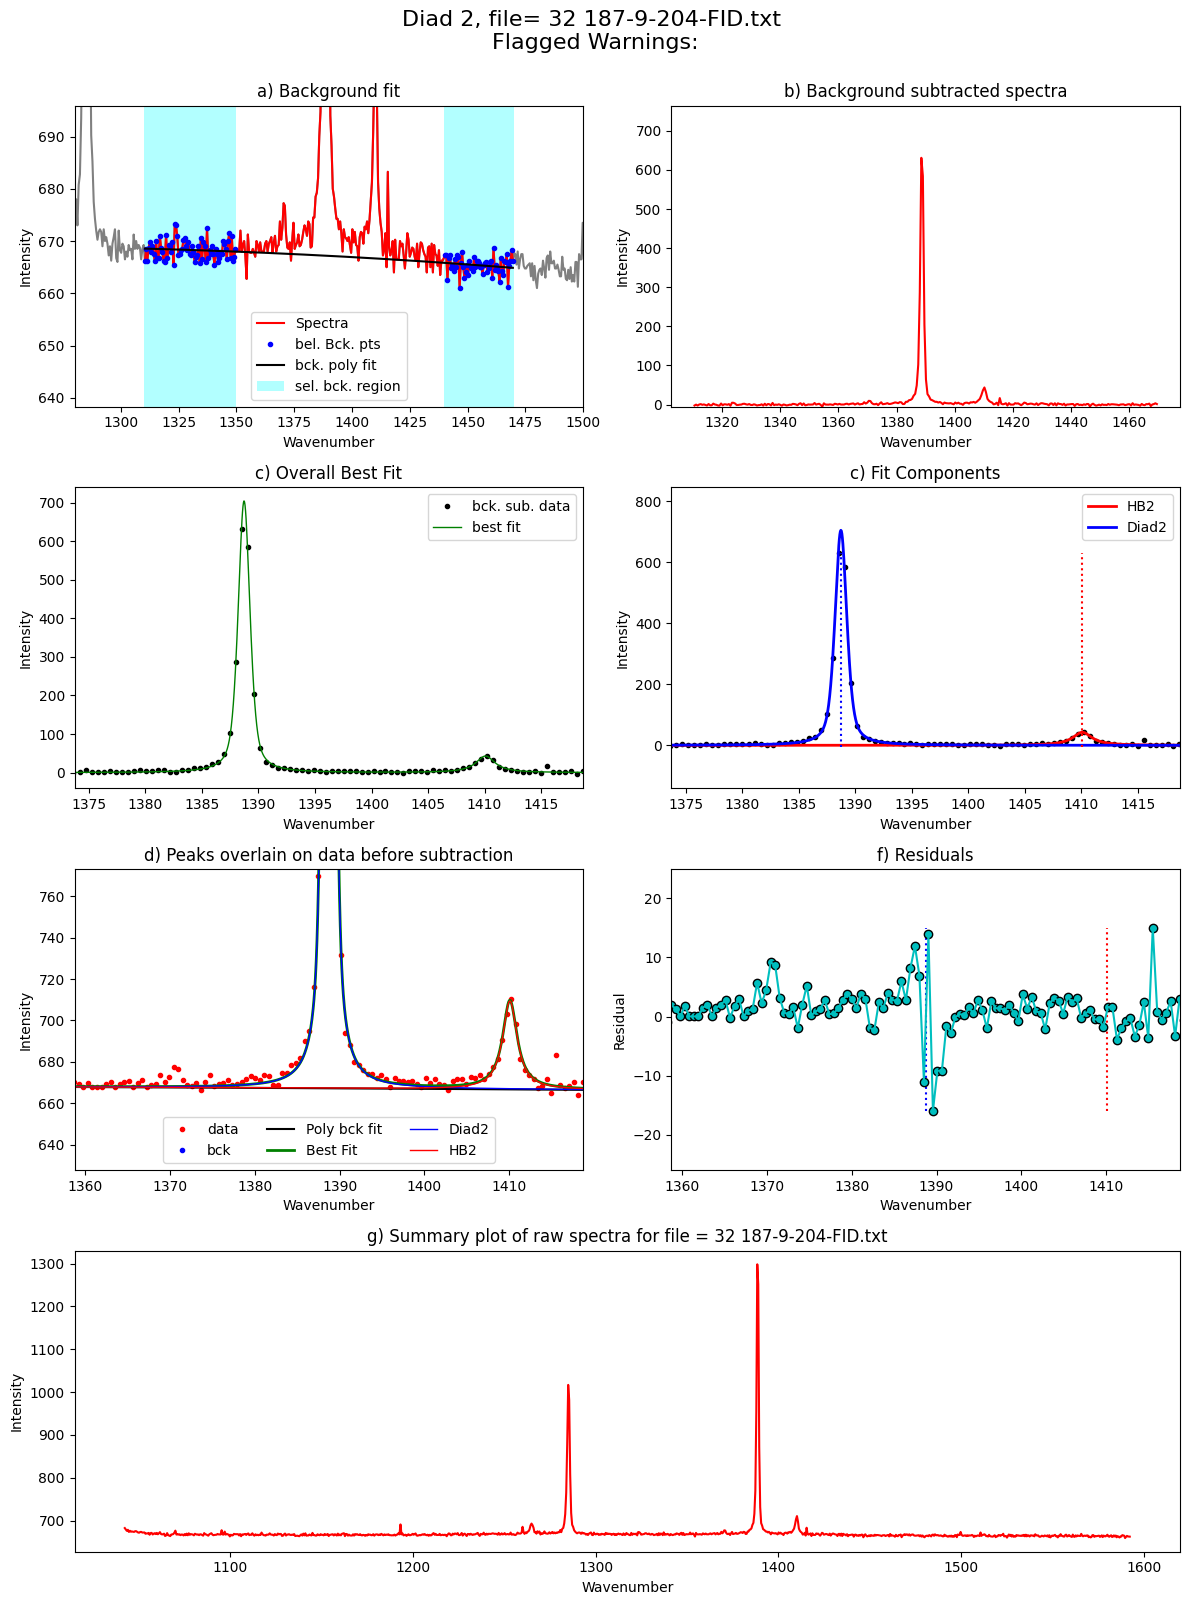

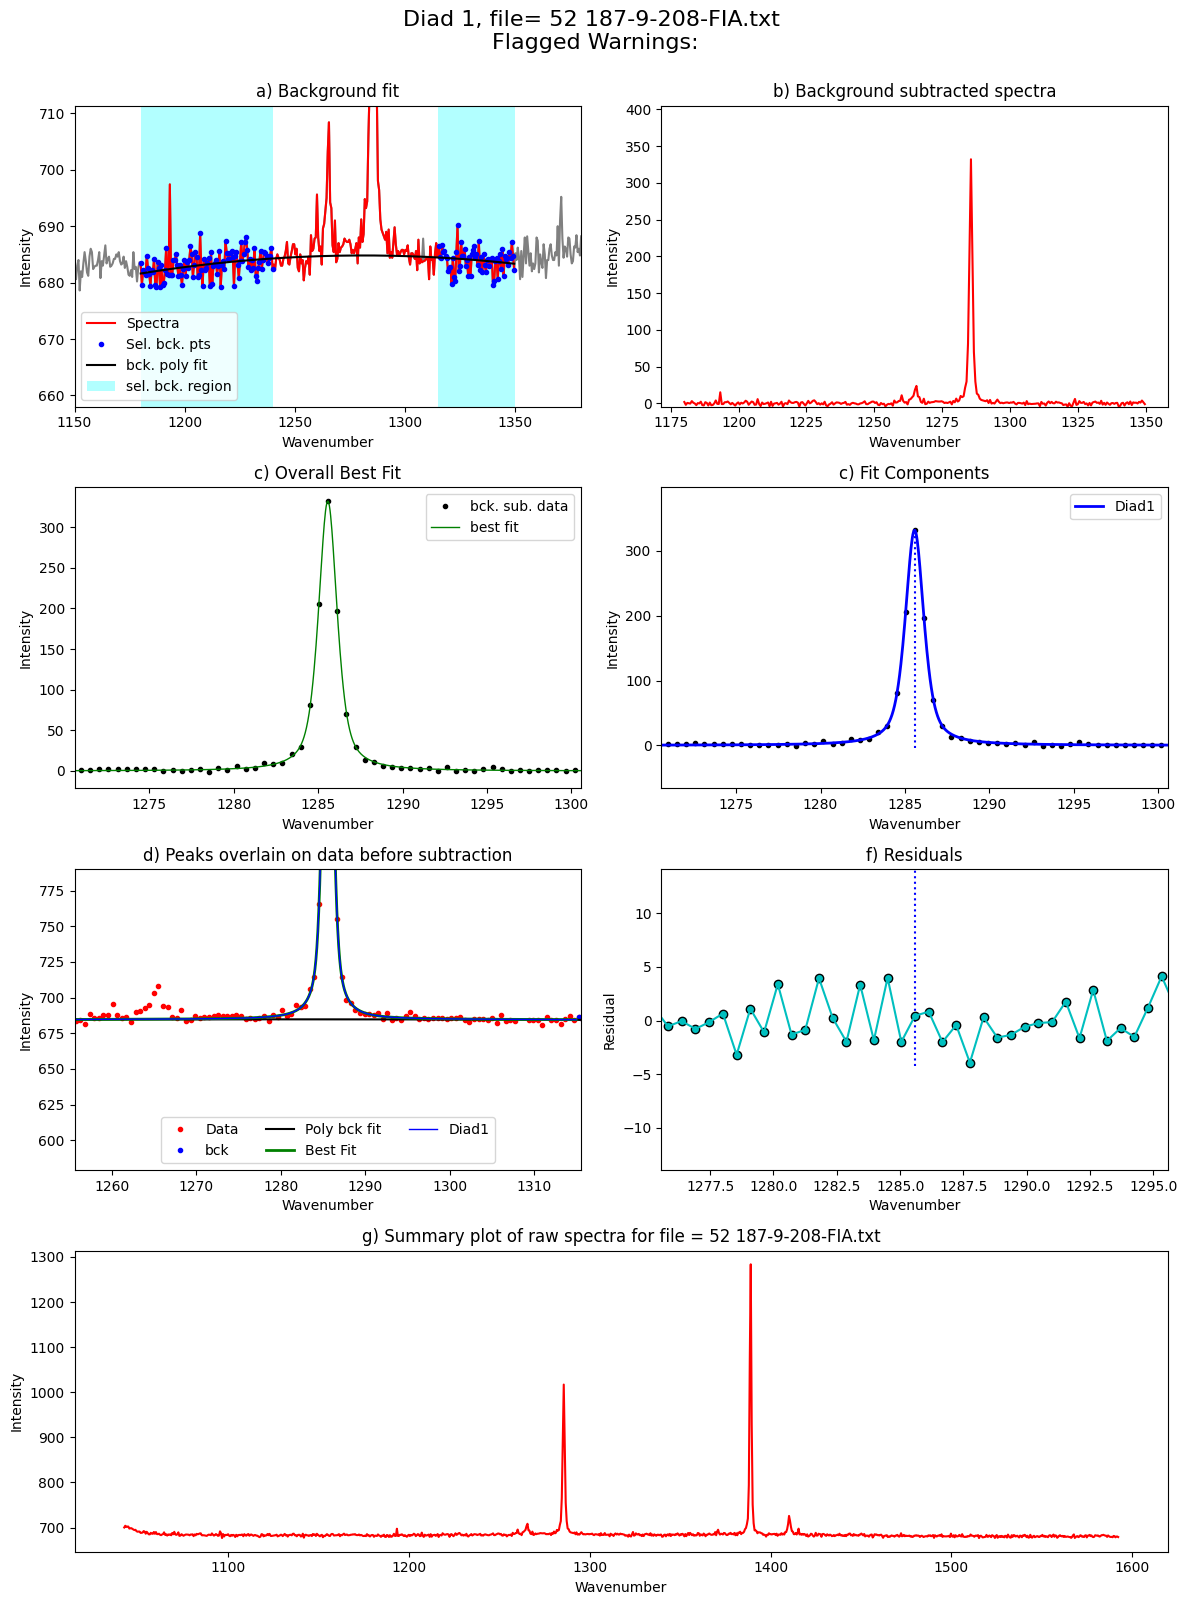

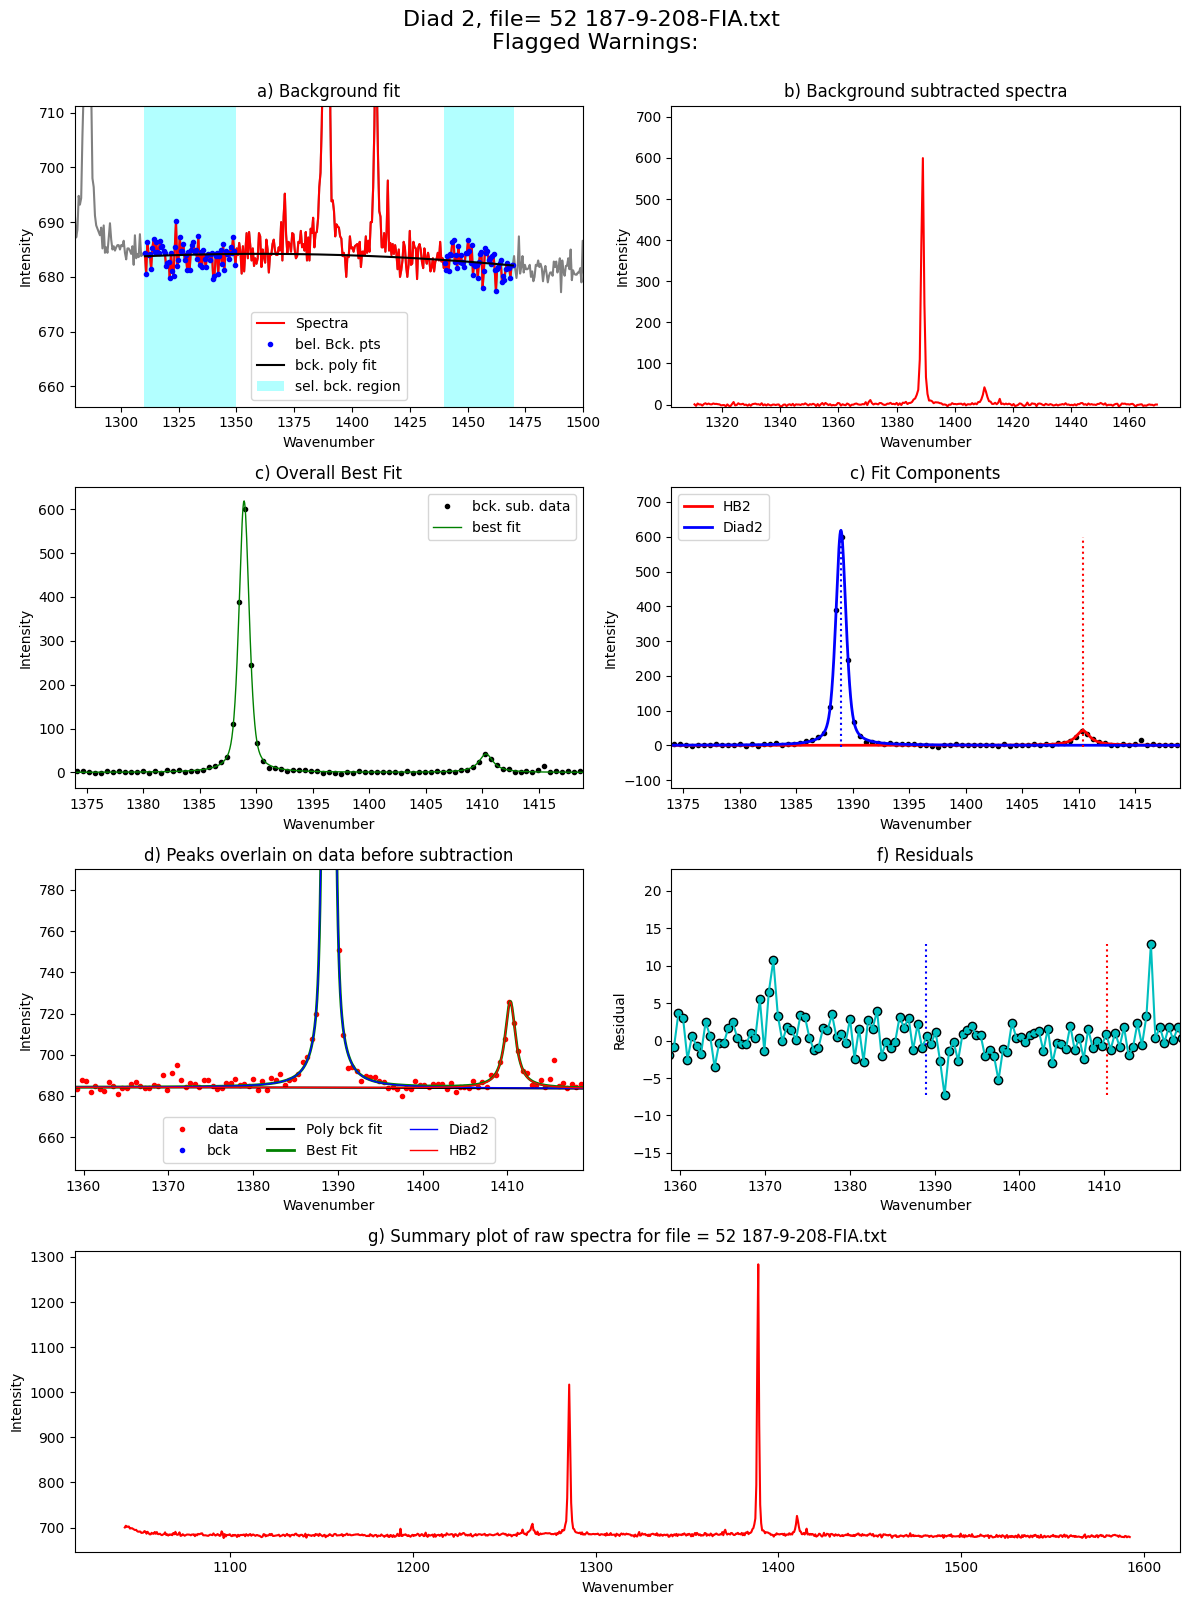

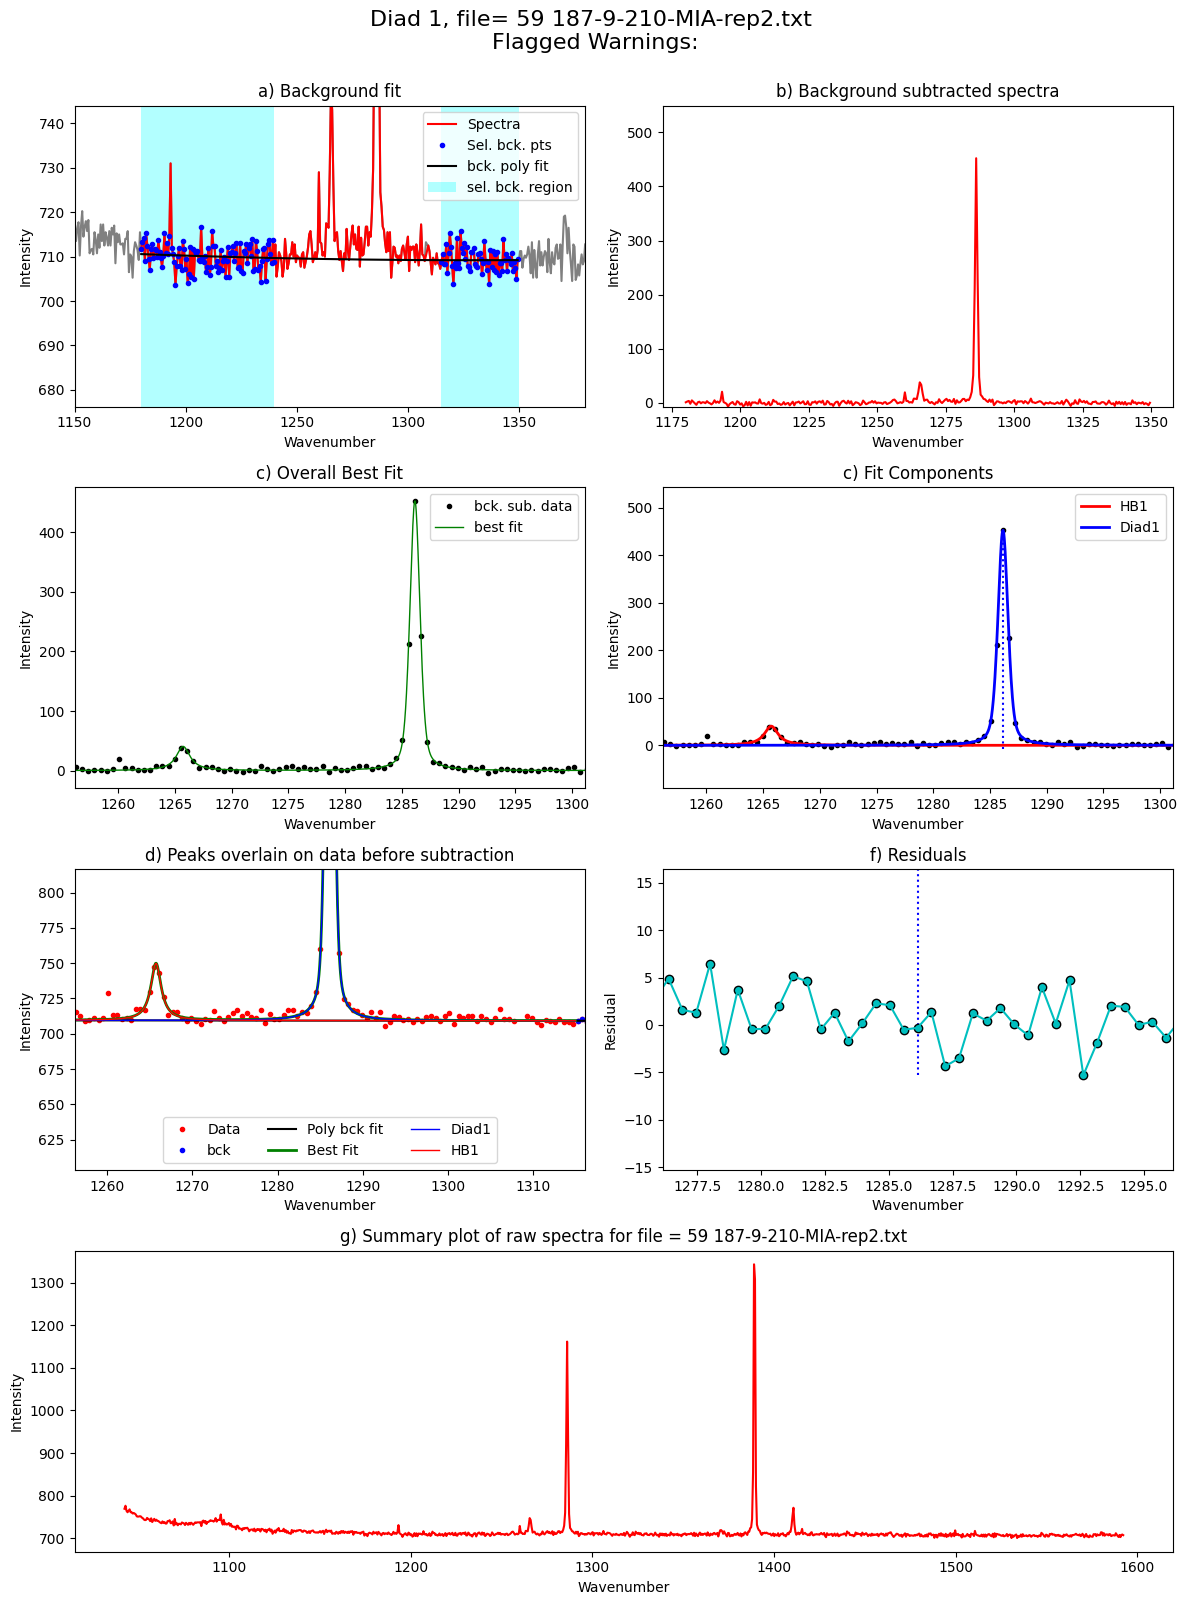

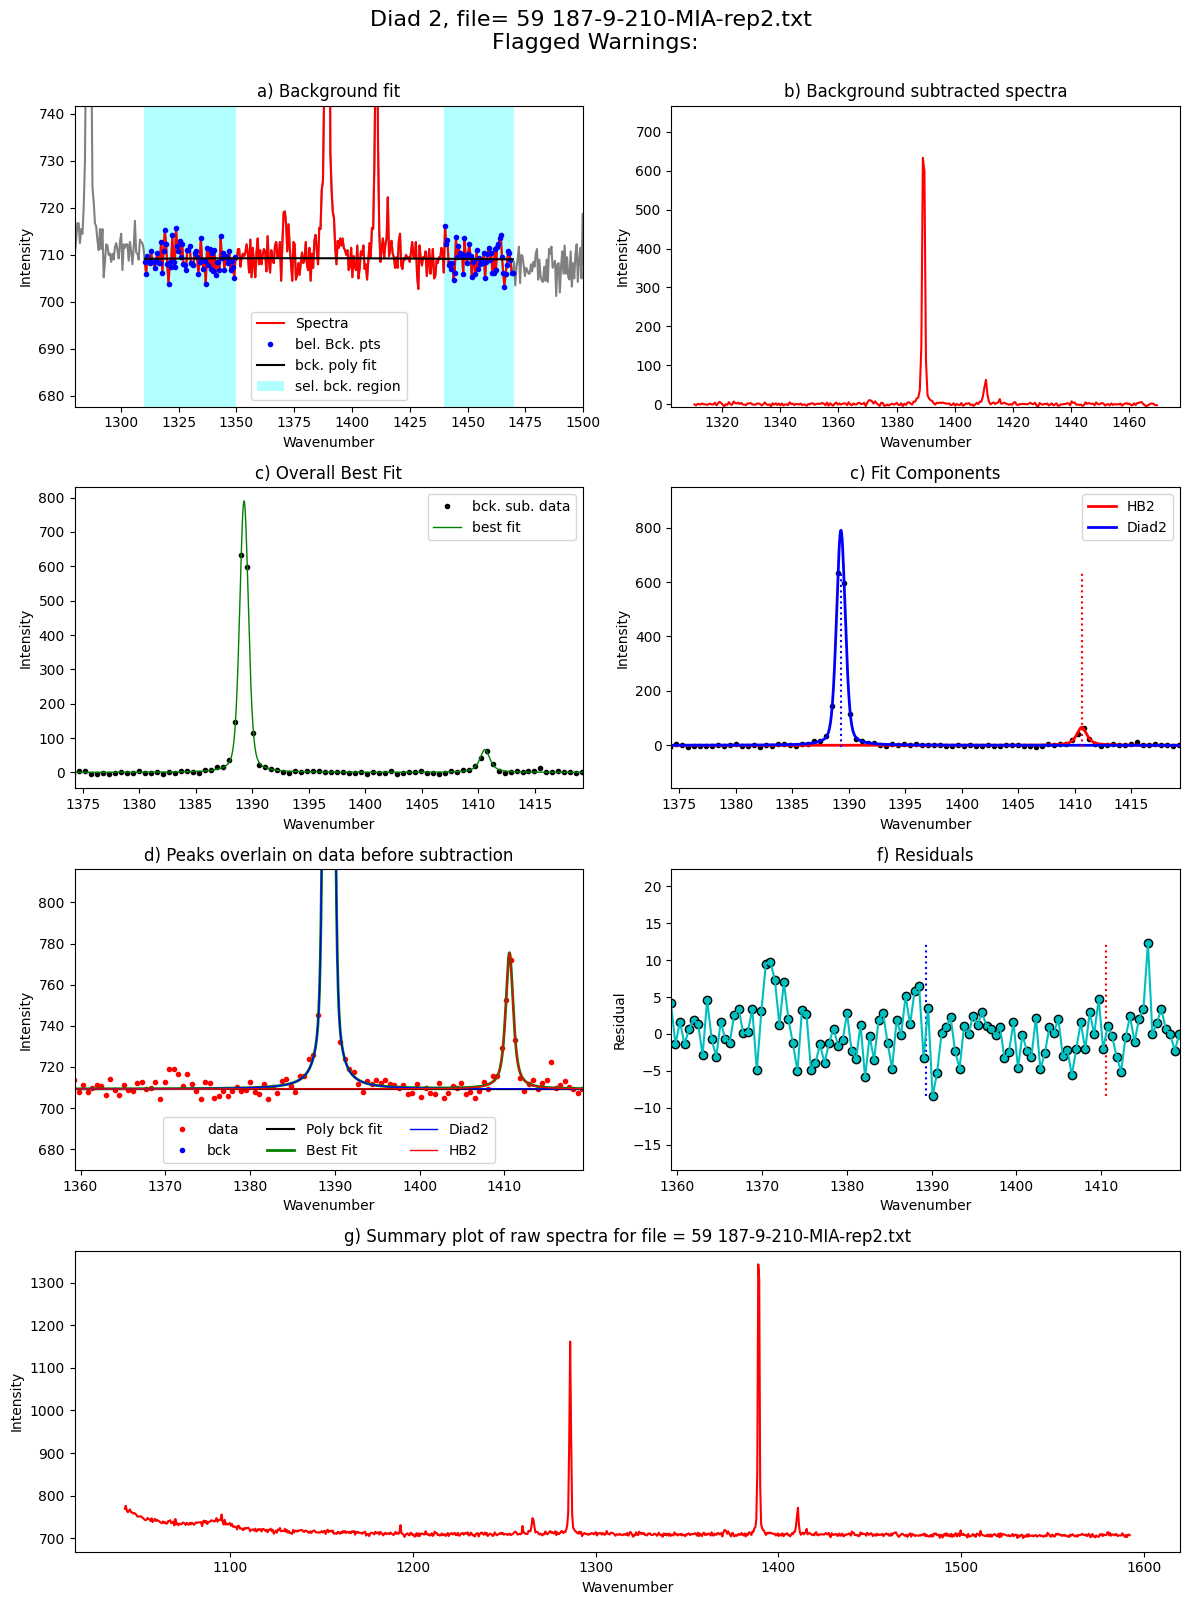

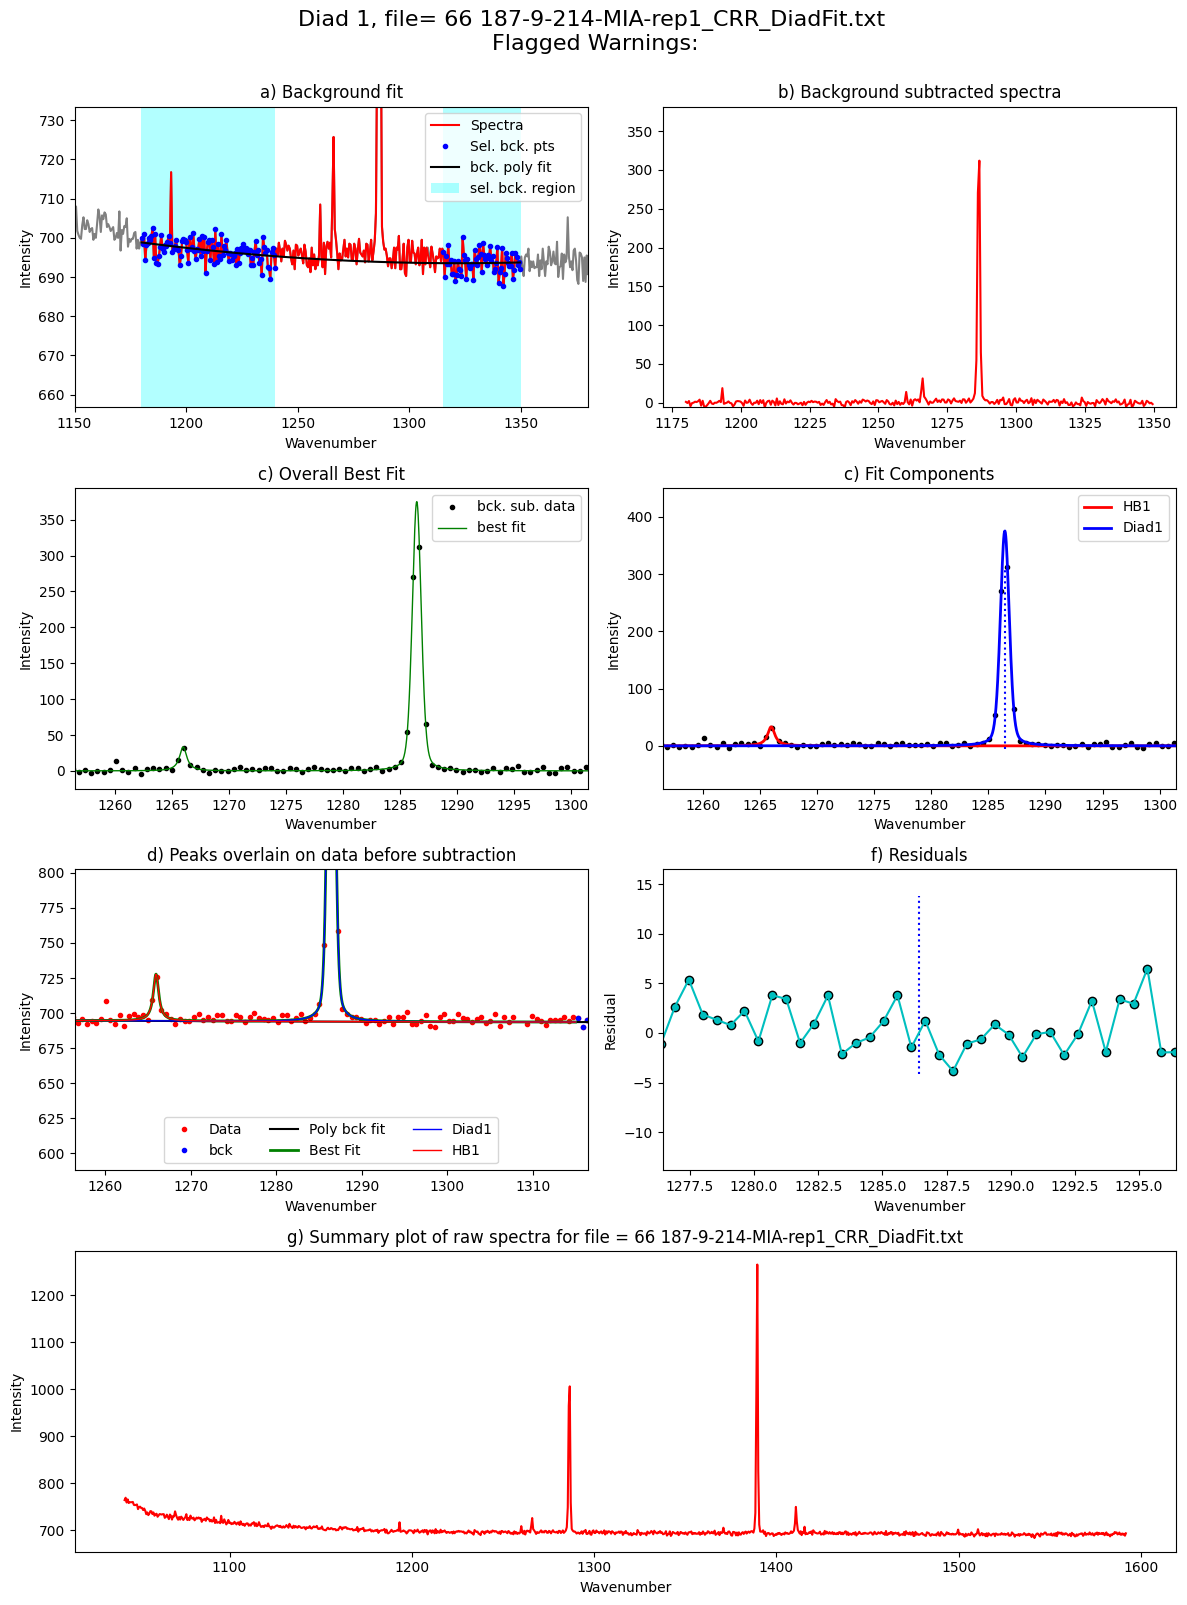

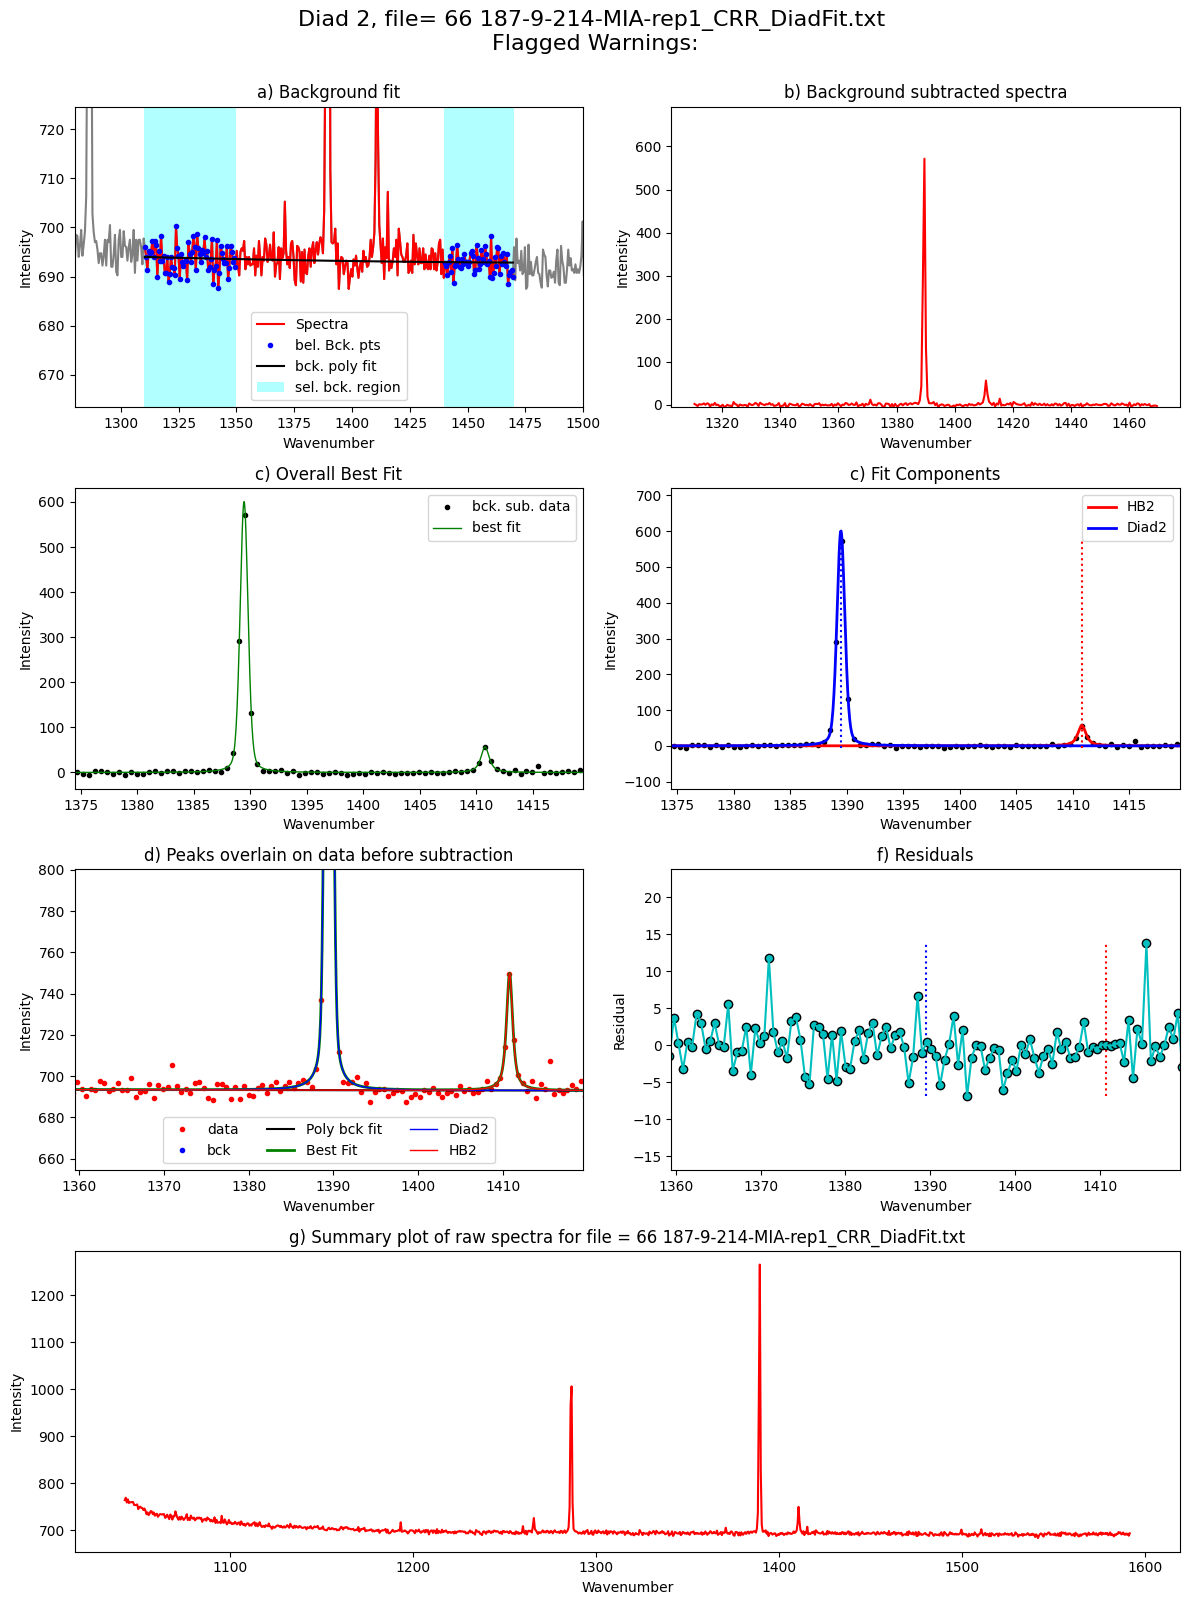

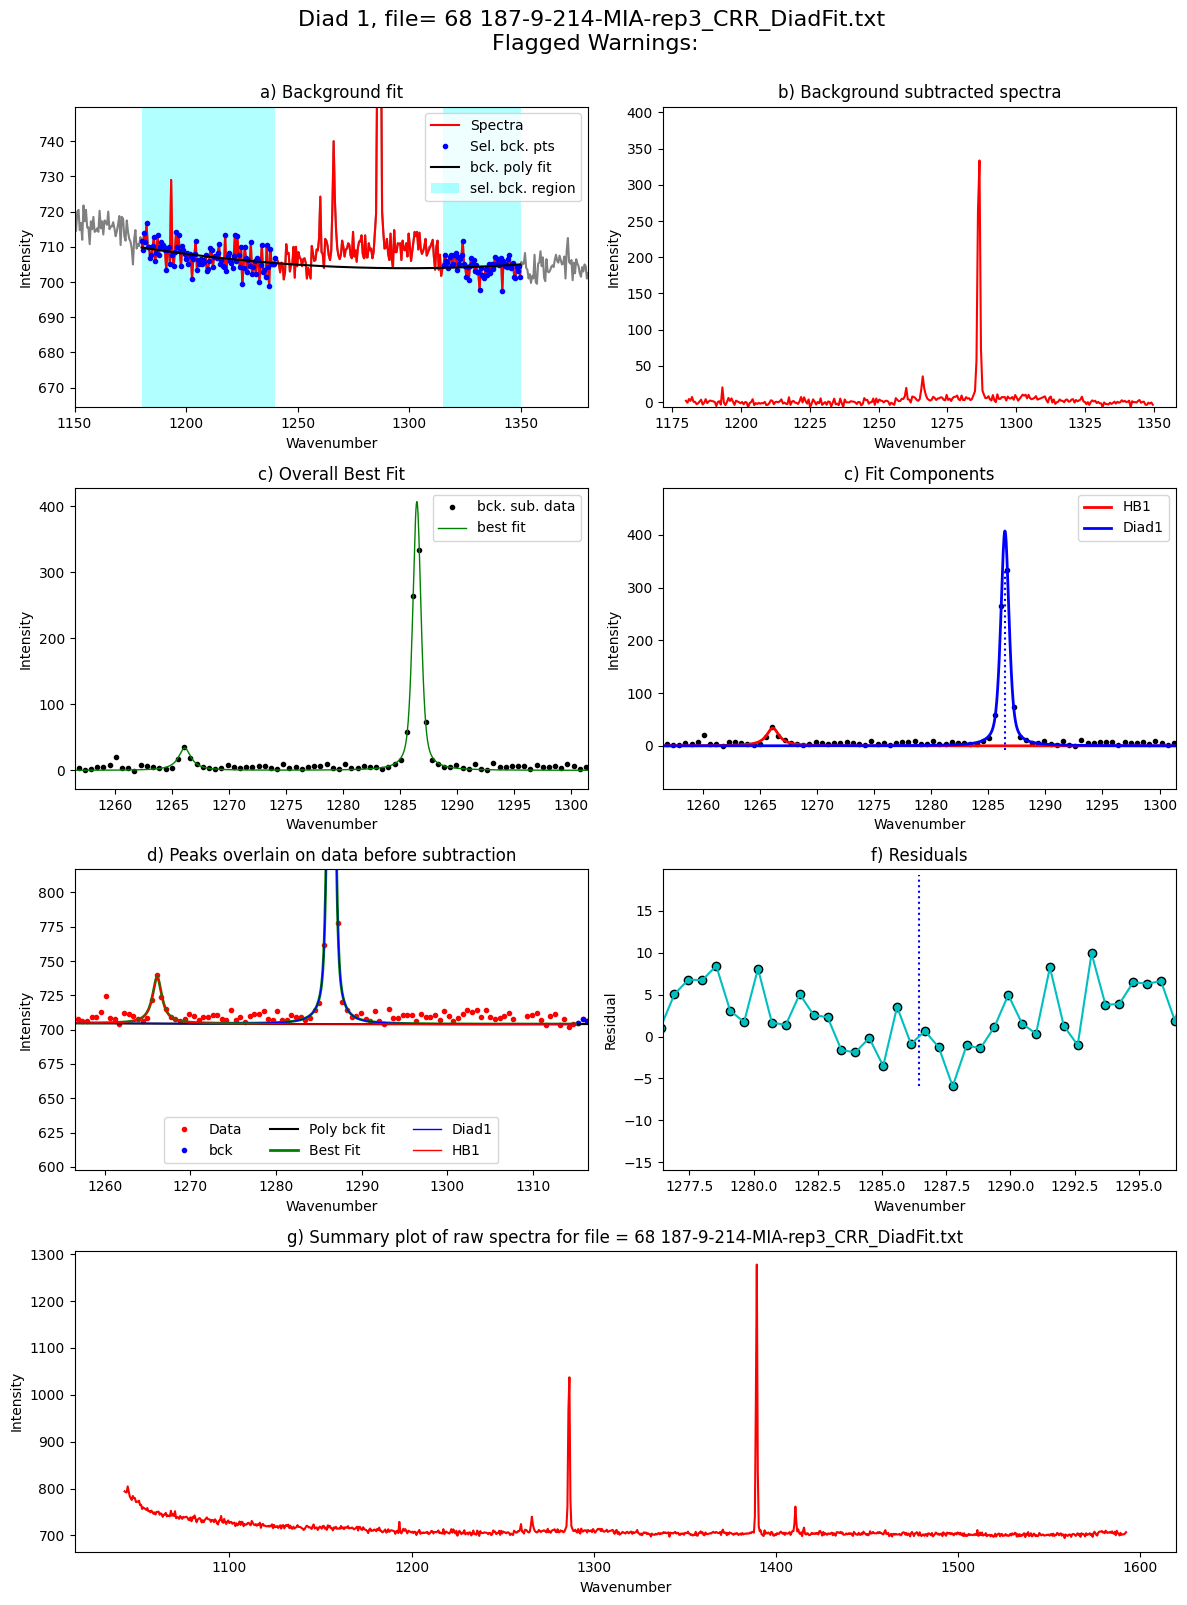

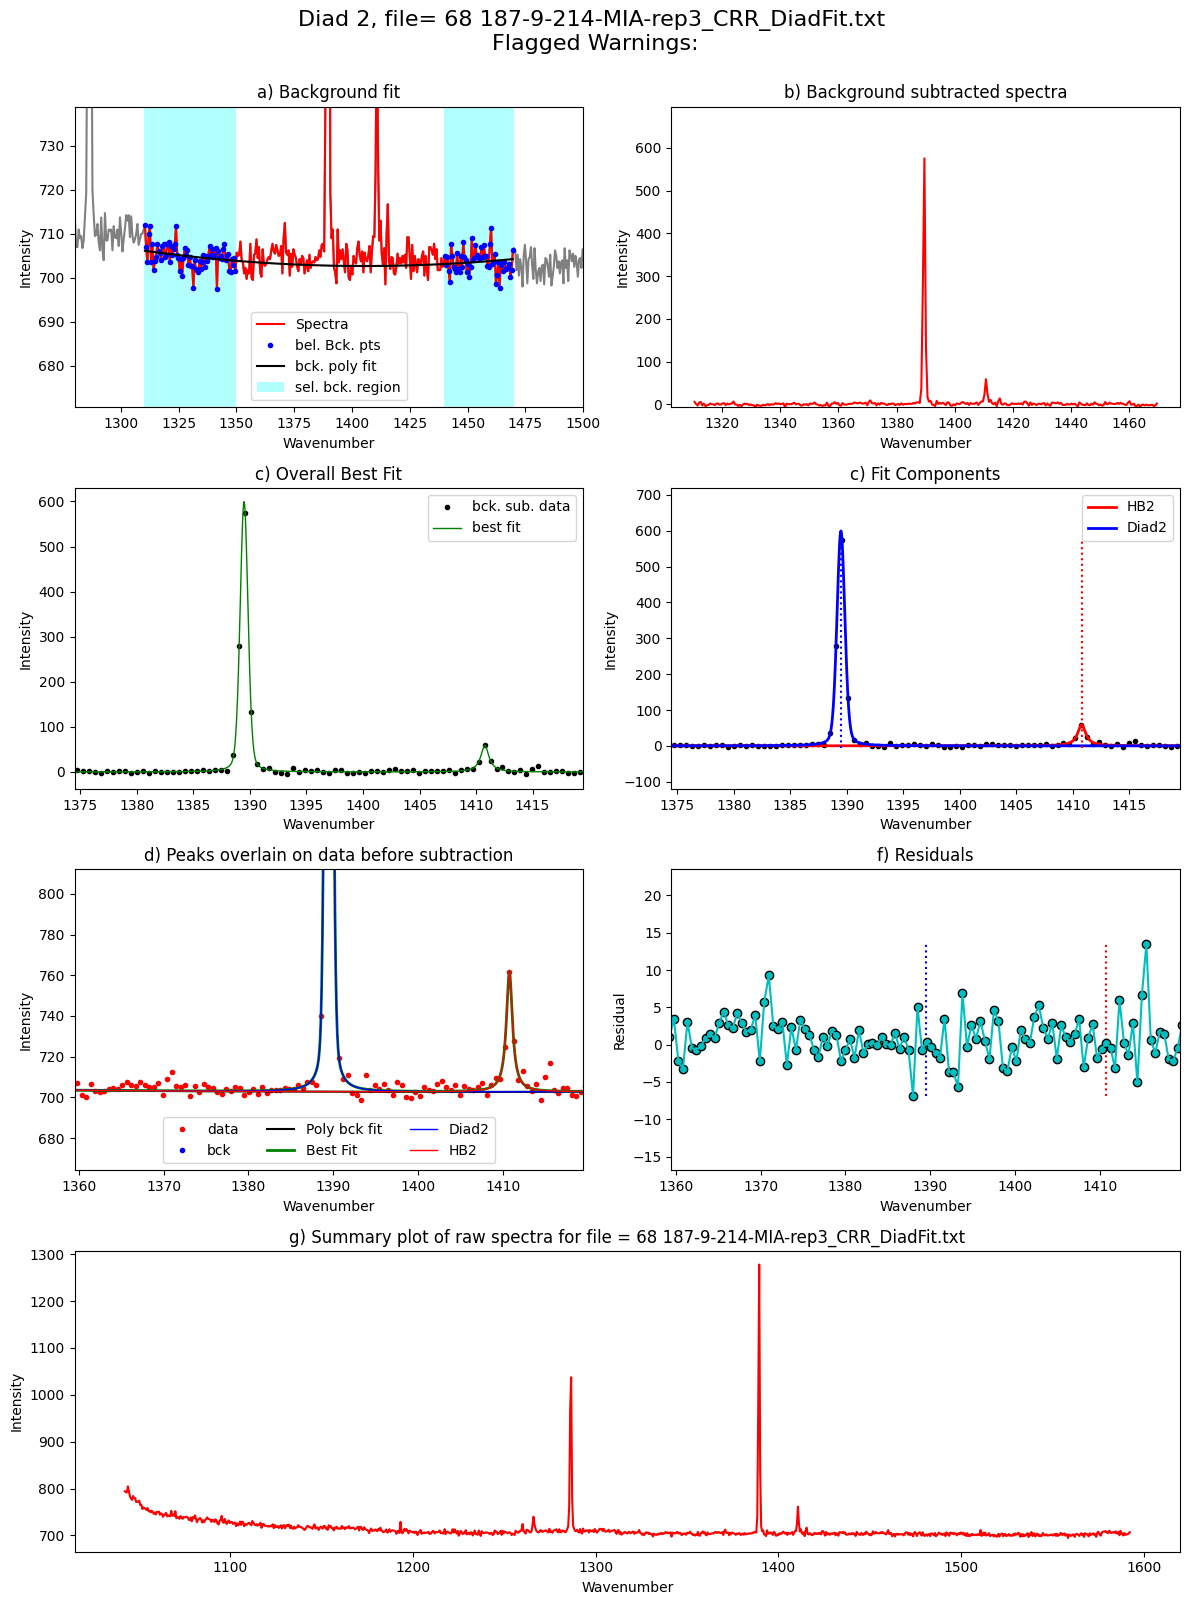

In [42]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [43]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [44]:
combo

filename   Splitting   Split_σ  Diad1_Combofit_Cent  \
0                  187-9-203b-FIA  103.849300  0.004560          1284.409455   
1                   187-9-204-FIB  103.611866  0.009475          1284.926548   
2       187-9-204-FIC_CRR_DiadFit  103.516394  0.004372          1285.174806   
3                   187-9-204-FIE  103.641682  0.009016          1284.886864   
4                   187-9-204-FID  103.526478  0.007500          1285.197473   
5                   187-9-208-FIA  103.369799  0.006328          1285.570505   
6              187-9-210-MIA-rep2  103.149931  0.004517          1286.141926   
7  187-9-214-MIA-rep1_CRR_DiadFit  103.031264  0.004619          1286.437740   
8  187-9-214-MIA-rep3_CRR_DiadFit  103.023691  0.006370          1286.455474   

   Diad1_cent_err  Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0        0.004258             625.630396       1284.409505       1732.589716   
1        0.008939             268.720069       1284.926548        636.323163   
2        0.003801             601.795332       1285.174856       1275.894462   
3        0.008425             281.193131       1284.886864        688.668772   
4        0.007076             366.292752       1285.197473        771.732920   
5        0.005940             331.960454       1285.570505        600.818601   
6        0.004167             452.688794       1286.141976        608.863626   
7        0.003804             375.296183       1286.437790        420.712537   
8        0.005763             407.264547       1286.455524        467.179116   

   Diad1_Voigt_Sigma  Diad1_Residual  ...  Diad1_Asym50  Diad1_Asym70  \
0           1.018065        2.990958  ...      1.149281      1.175192   
1           0.875785        2.558698  ...      1.162162      1.246177   
2           0.783327        2.468579  ...      1.070796      1.161398   
3           0.894585        2.417295  ...      1.161224      1.226804   
4           0.792900        2.718715  ...      1.071895      1.143791   
5           0.656599        2.035226  ...      1.039267      1.059150   
6           0.527198        2.108127  ...      1.019417      1.016355   
7           0.464255        2.187141  ...      1.156667      1.160950   
8           0.428991        3.781323  ...      1.235088      1.250000   

  Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  Diad2_Asym50  Diad2_Asym70  \
0                  0.303955              0.003255      1.050459      1.067993   
1                  0.284038              0.006518      1.007500      1.029740   
2                  0.110914              0.002603      1.036458      1.021277   
3                  0.288458              0.006363      1.022388      1.095149   
4                  0.114012              0.004329      1.018088      1.073559   
5                  0.051565              0.003956      1.185430      1.181598   
6                  0.020474              0.002329      1.031546      1.024814   
7                  0.145467              0.002474      1.181818      1.249201   
8                  0.201701              0.002107      1.167364      1.233010   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad1_PDF_Model  \
0                   0.074370              0.001116  PseudoVoigtModel   
1                   0.010001              0.002479  PseudoVoigtModel   
2                   0.045831              0.001087  PseudoVoigtModel   
3                   0.030406              0.002399  PseudoVoigtModel   
4                   0.022560              0.001771  PseudoVoigtModel   
5                   0.198501              0.001730  PseudoVoigtModel   
6                   0.028950              0.001161  PseudoVoigtModel   
7                   0.150475              0.001376  PseudoVoigtModel   
8                   0.137934              0.001374  PseudoVoigtModel   

    Diad2_PDF_Model  
0  PseudoVoigtModel  
1  PseudoVoigtModel  
2  PseudoVoigtModel  
3  PseudoVoigtModel  
4  PseudoVoigtModel  
5  PseudoVoigtModel  
6  Pse

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [45]:
# # !pip install winotify

# from winotify import Notification, audio

# toast= Notification(app_id="VSCode",title="Notebook completed",
#                     msg="Step3b_Secondary_Peaks is done!",
#                     duration="short")
# toast.set_audio(audio.Mail,loop=False)
# toast.show()